<img src='files/exeter_logo_grey.png' width=500 height=500 />

<p class='alert alert-success' style='font-size:28px;text-align:center;'>
    Covid-19 UK Mobility Project - Spatio-Temporal Analyses
</p>

In [1]:
%matplotlib inline
import gc as garbage
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from aux_functions import *

%load_ext autoreload
%autoreload 2

<p class='alert alert-success' style='font-size:20px;text-align:center;'>
    Out-of-home Trips
</p>

In [2]:
file_months = {'20.01-02_full_result':[1, 2], '20.03-04_full_result':[3, 4], 
               '20.05-06_full_result':[5, 6], '20.07-08_full_result':[7, 8], 
               '20.09_full_result':[9], '20.10_full_result':[10], '20.11_full_result':[11], 
               '20.12_full_result':[12]}

file_months_2019 = {'19.01_full_result':[1], '19.02-03_full_result':[2, 3],
                    '19.04-05_full_result':[4, 5], '19.06-07_full_result':[6, 7], 
                    '19.08_full_result':[8], '19.09_full_result':[9], 
                    '19.10_full_result':[10], '19.11_full_result':[11], '19.12_full_result':[12]}

file_months_2021 = {'21.01_full_result':[1], '21.02_full_result':[2]}

sync_df = load_sync_data(file_months, year=2020)
sync_df['year'] = sync_df.dt.apply(lambda x: x.year)
sync_df_ = sync_df.groupby(['geo_code', 'week', 'year'])['count'].sum()
sync_df_ = sync_df_.reset_index()
history_out_home_df = get_metric(sync_df_, count_by='count')

sync_df_2021 = load_sync_data(file_months_2021, year=2021)
sync_df_2021['year'] = sync_df_2021.dt.apply(lambda x: x.year)
sync_df_2021_ = sync_df_.groupby(['geo_code', 'week', 'year'])['count'].sum()
sync_df_2021_ = sync_df_2021_.reset_index()
history_out_home_df_2021 = get_metric(sync_df_2021_, count_by='count')

sync_df_2019 = load_sync_data(file_months_2019, year=2019)
sync_df_2019['year'] = sync_df_2019.dt.apply(lambda x: x.year)
sync_concat = pd.concat([sync_df_2019, sync_df, sync_df_2021])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


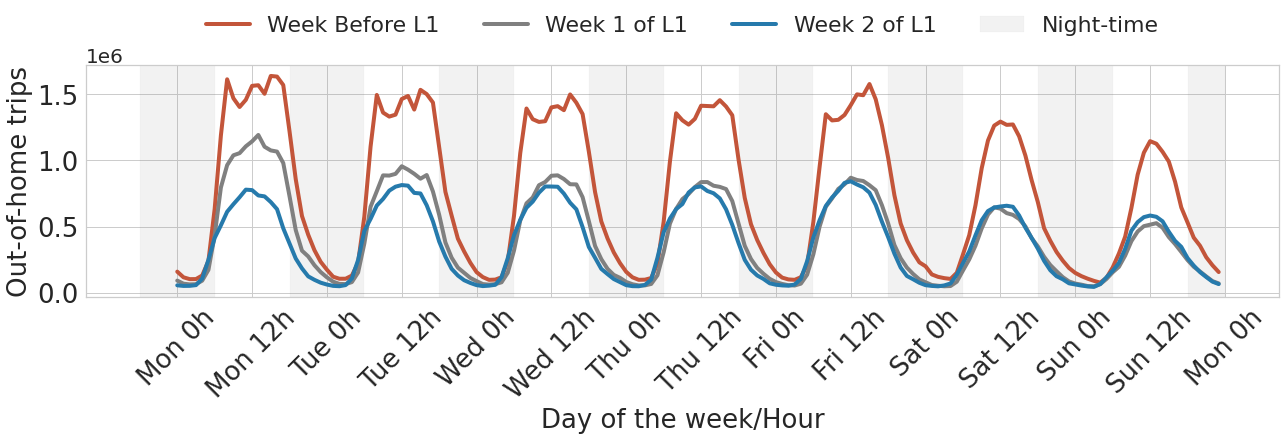

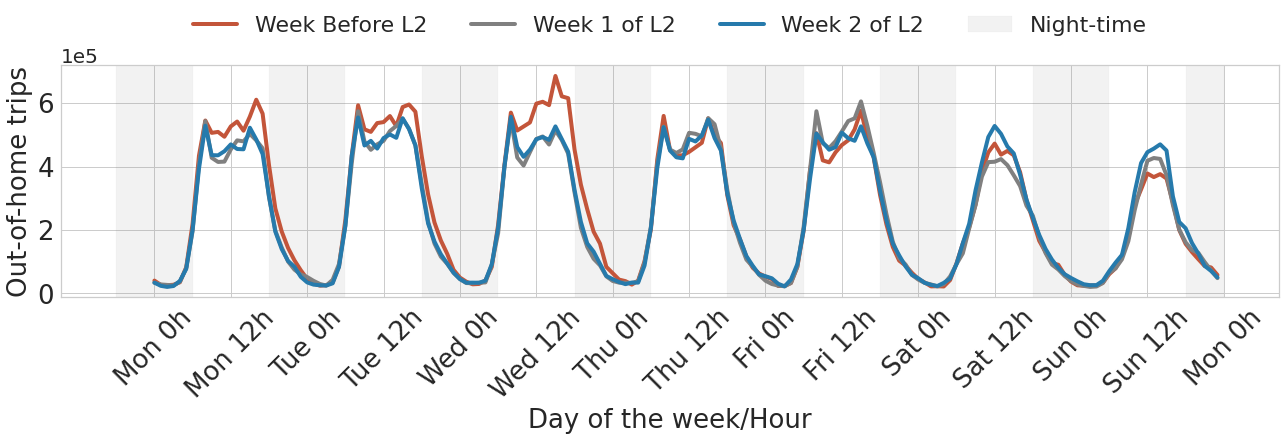

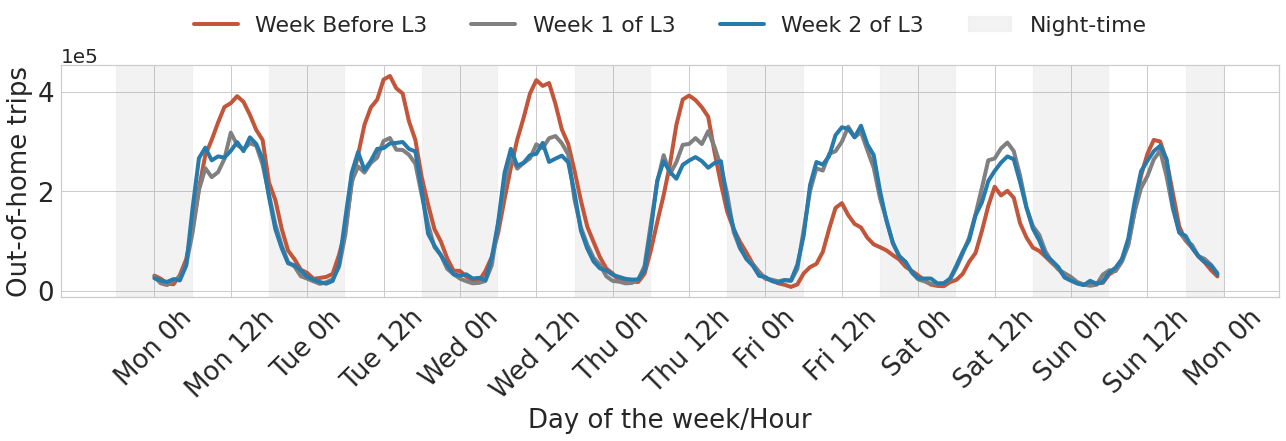

In [3]:
# 12, 45
months_l1 = ['Week Before L1', 'Week 1 of L1', 'Week 2 of L1']
months_l2 = ['Week Before L2', 'Week 1 of L2', 'Week 2 of L2']
months_l3 = ['Week Before L3', 'Week 1 of L3', 'Week 2 of L3']
syncs_l1, syncs_l2, syncs_l3 = [], [], []

for w in range(3):
    syncs_l1.append(sync_df[sync_df.week==(12 + w)].groupby(['week','weekday','hourr'])['count'].sum().values)
    syncs_l2.append(sync_df[sync_df.week==(45 + w)].groupby(['week','weekday','hourr'])['count'].sum().values)

syncs_l3.append(sync_df[sync_df.week==52].groupby(['week','weekday','hourr'])['count'].sum().values)
syncs_l3.append(sync_df_2021[sync_df_2021.week==1].groupby(['week','weekday','hourr'])['count'].sum().values)
syncs_l3.append(sync_df_2021[sync_df_2021.week==2].groupby(['week','weekday','hourr'])['count'].sum().values)

plot_sync_week(syncs_l1, months_l1, ['#c3553a', 'grey', '#267aac'], title='')
plot_sync_week(syncs_l2, months_l2, ['#c3553a', 'grey', '#267aac'], title='')
plot_sync_week(syncs_l3, months_l3, ['#c3553a', 'grey', '#267aac'], title='')


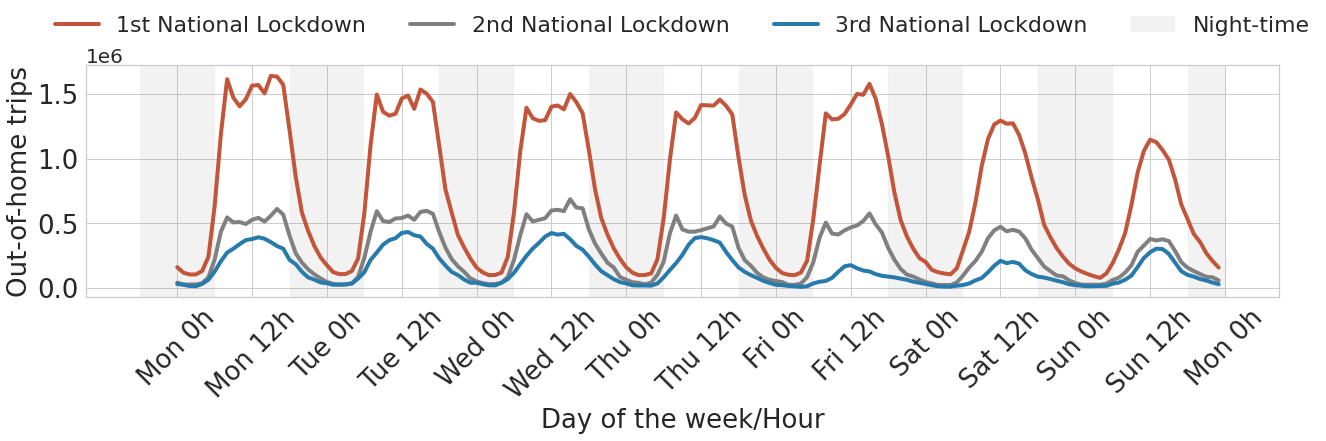

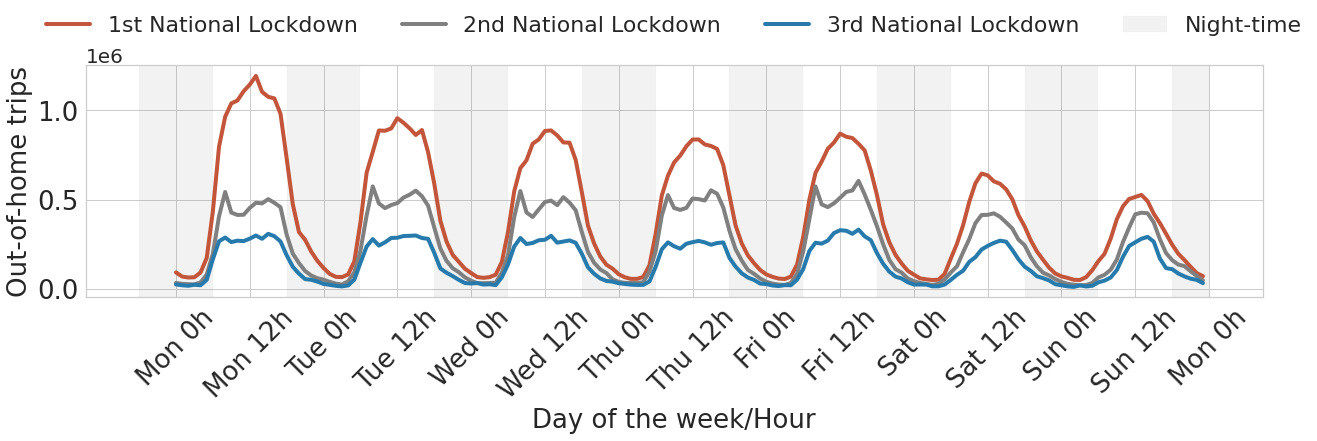

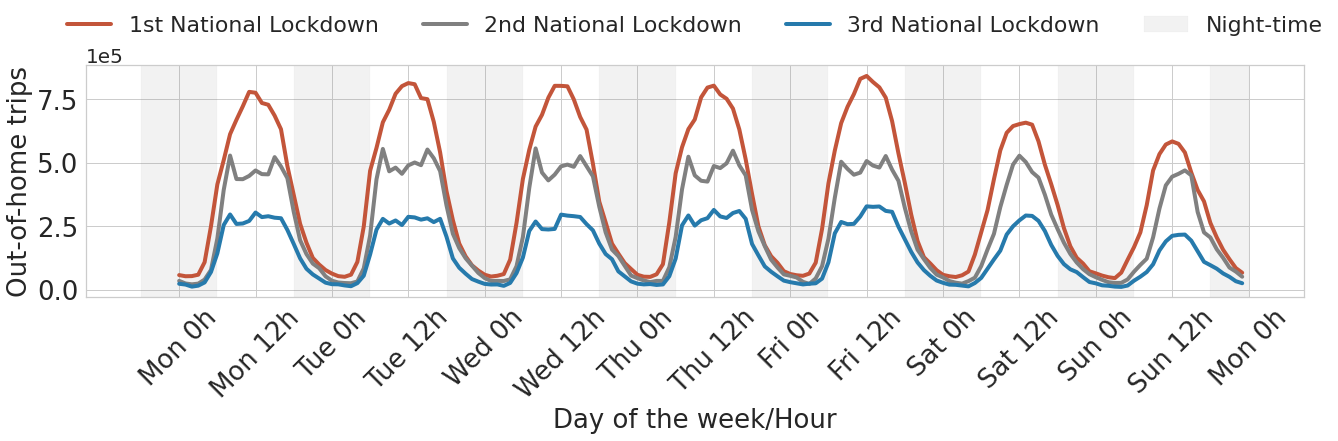

In [4]:
legends = ['1st National Lockdown', '2nd National Lockdown', '3rd National Lockdown']
syncs_ = [[], [], []]

for w in range(3):
    syncs_[w].append(sync_df[sync_df.week==(12 + w)].groupby(['week','weekday','hourr'])['count'].sum().values)
    syncs_[w].append(sync_df[sync_df.week==(45 + w)].groupby(['week','weekday','hourr'])['count'].sum().values)

syncs_[0].append(sync_df[sync_df.week==52].groupby(['week','weekday','hourr'])['count'].sum().values)
syncs_[1].append(sync_df_2021[sync_df_2021.week==2].groupby(['week','weekday','hourr'])['count'].sum().values)
syncs_[2].append(sync_df_2021[sync_df_2021.week==3].groupby(['week','weekday','hourr'])['count'].sum().values)

plot_sync_week(syncs_[0], legends, ['#c3553a', 'grey', '#267aac'], title='')
plot_sync_week(syncs_[1], legends, ['#c3553a', 'grey', '#267aac'], title='')
plot_sync_week(syncs_[2], legends, ['#c3553a', 'grey', '#267aac'], title='')


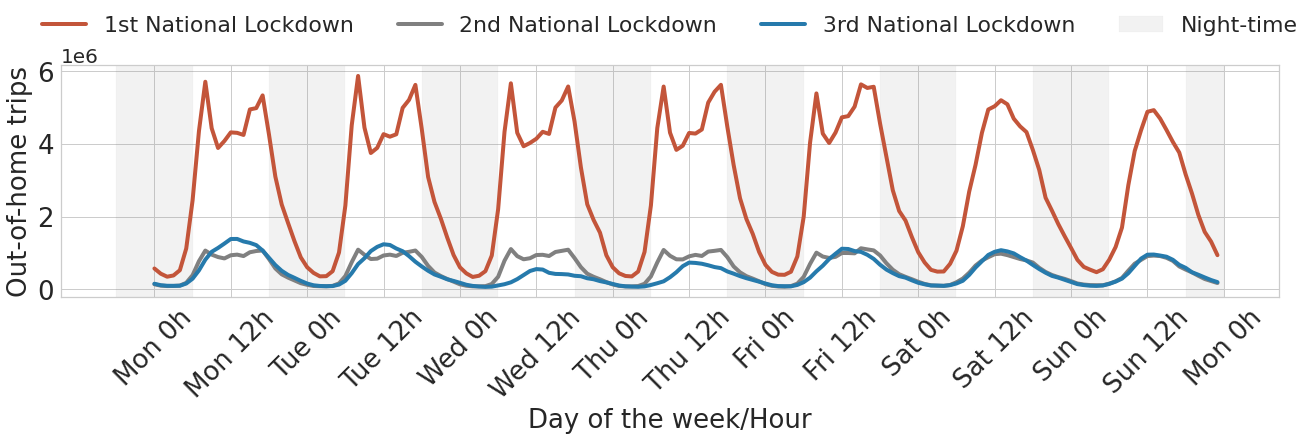

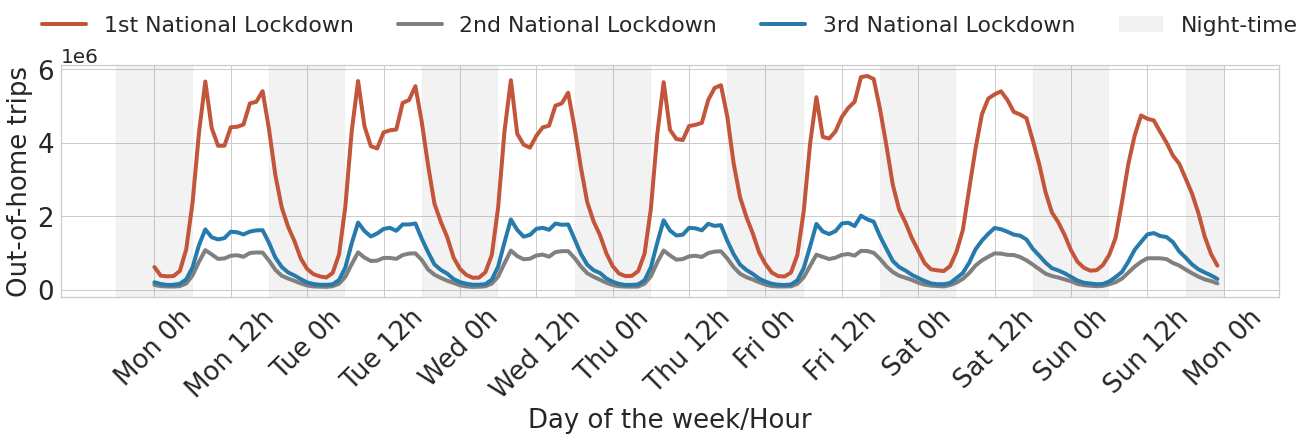

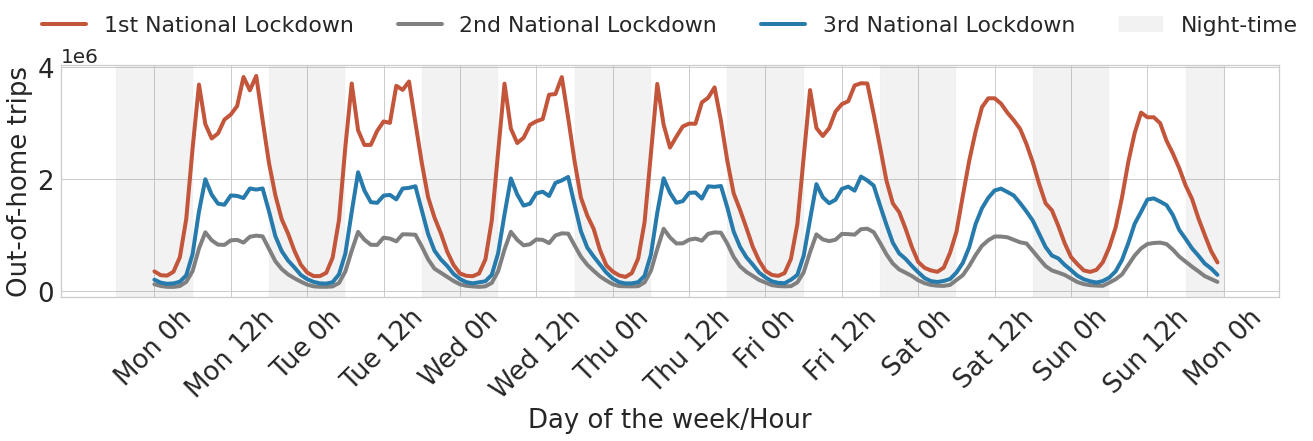

In [5]:
legends = ['1st National Lockdown', '2nd National Lockdown', '3rd National Lockdown']
syncs_ = [[], [], []]

for w in range(3):
    syncs_[w].append(sync_df_2019[sync_df_2019.week==(12 + w)].groupby(['week','weekday','hourr'])['count'].sum().values)
    syncs_[w].append(sync_df_2019[sync_df_2019.week==(45 + w)].groupby(['week','weekday','hourr'])['count'].sum().values)

syncs_[0].append(sync_df_2019[sync_df_2019.week==52].groupby(['week','weekday','hourr'])['count'].sum().values)
syncs_[1].append(sync_df[sync_df.week==2].groupby(['week','weekday','hourr'])['count'].sum().values)
syncs_[2].append(sync_df[sync_df.week==3].groupby(['week','weekday','hourr'])['count'].sum().values)

plot_sync_week(syncs_[0], legends, ['#c3553a', 'grey', '#267aac'], title='')
plot_sync_week(syncs_[1], legends, ['#c3553a', 'grey', '#267aac'], title='')
plot_sync_week(syncs_[2], legends, ['#c3553a', 'grey', '#267aac'], title='')

In [6]:
ax = history_out_home_df.T.plot(figsize=(16, 8), linewidth=5, marker='o', ms=12, 
                                color=['#7e7e7e', '#c3553a', '#267aac', '#dfa496', '#9bbbcf'])
plt.axvline(x=11,linestyle='dashed',lw=3,color='grey',label='1st Lockdown')
plt.axvline(x=43,linestyle='dashed',lw=3,color='grey',label='2nd Lockdown')
# plt.title('Out-of-Home Trips in the UK 2020', fontsize=28)
plt.ylabel('Number of Trips', fontsize=28)
ax.xaxis.set_tick_params(labelsize=24)
ax.yaxis.set_tick_params(labelsize=24)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.yaxis.get_offset_text().set_fontsize(22)
plt.legend(fontsize=24, loc='upper right')
plt.grid(linewidth=.25)
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [7]:
sync_df_2019_ = sync_df_2019.groupby(['year','geo_code', 'week'])['count'].sum()
sync_df_2019_ = sync_df_2019_.reset_index()
history_out_home_2019_df = get_metric(sync_df_2019_, count_by='count')

ax = history_out_home_2019_df.T.plot(figsize=(16, 8), linewidth=5, marker='o', ms=12,
                                     color=['#7e7e7e', '#c3553a', '#267aac', '#dfa496', '#9bbbcf'])
# plt.axvline(x=10,linestyle='dashed',lw=3,color='grey',label='Partial lockdown')
# plt.title('Out-of-Home Trips in the UK 2019', fontsize=28)
plt.ylabel('Number of Trips', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)
ax.yaxis.get_offset_text().set_fontsize(22)
plt.legend(fontsize=18, loc='upper right')
plt.grid(linewidth=.25)
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


128 128
128 128
128 128
128 128
128 128
128 128
128 128
64 64
128 128


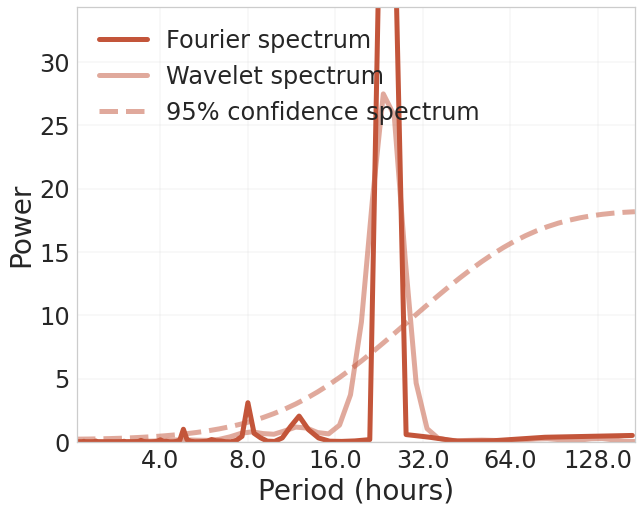

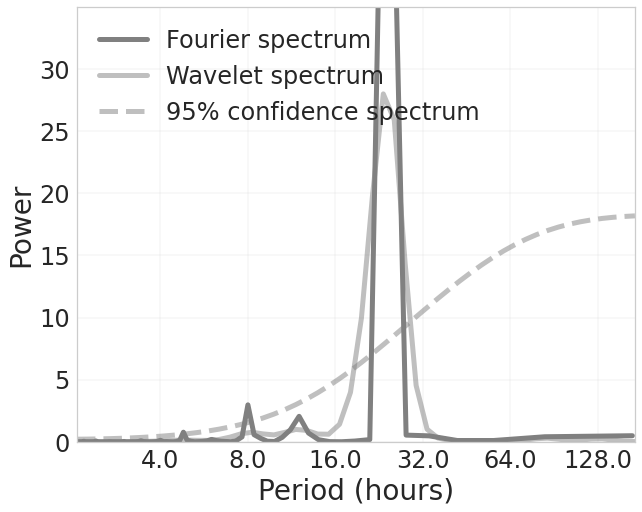

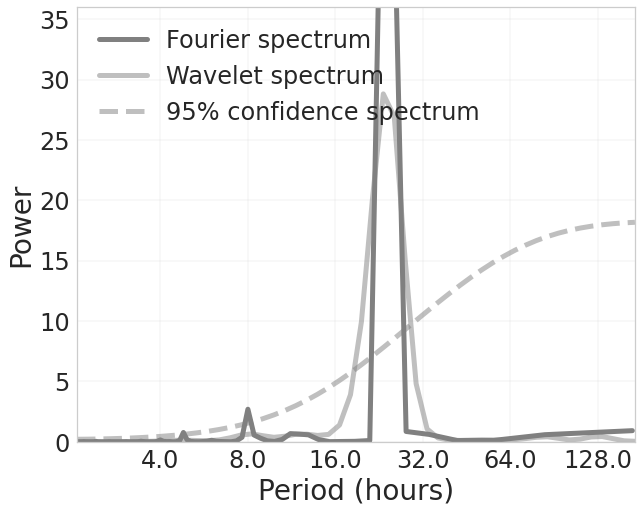

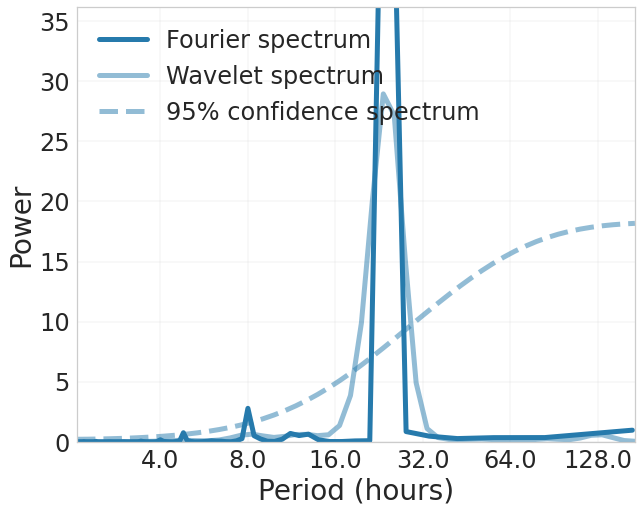

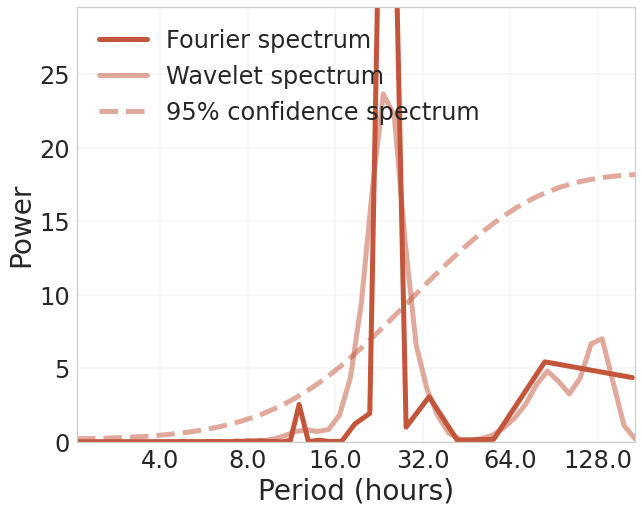

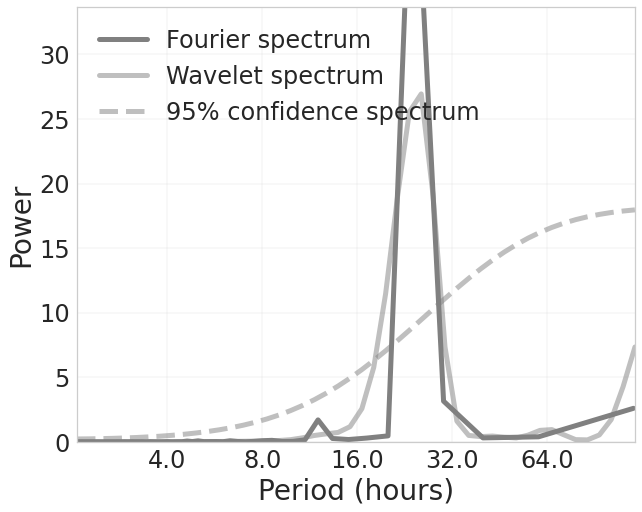

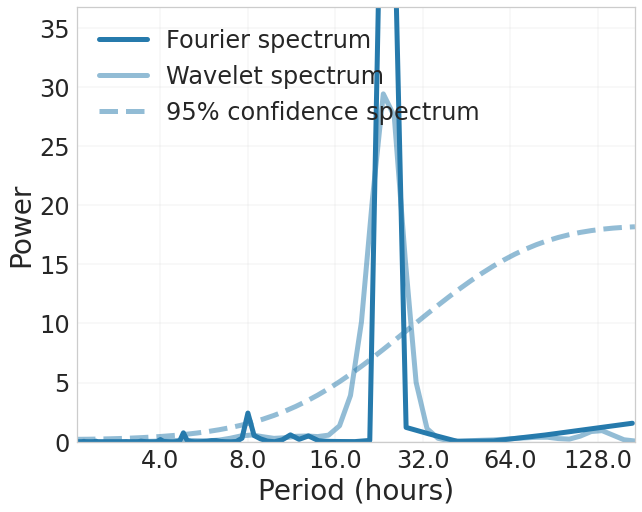

In [8]:
# 12, 13, 45, 46
x2019_b1 = normalize(sync_df_2019[sync_df_2019.week==12].groupby(['week','weekday','hourr'])['count'].sum().values)
x2019_d1 = normalize(sync_df_2019[sync_df_2019.week==13].groupby(['week','weekday','hourr'])['count'].sum().values)
x2019_a1 = normalize(sync_df_2019[sync_df_2019.week==14].groupby(['week','weekday','hourr'])['count'].sum().values)

x2019_b2 = normalize(sync_df_2019[sync_df_2019.week==44].groupby(['week','weekday','hourr'])['count'].sum().values)
x2019_d2 = normalize(sync_df_2019[sync_df_2019.week==45].groupby(['week','weekday','hourr'])['count'].sum().values)
x2019_a2 = normalize(sync_df_2019[sync_df_2019.week==46].groupby(['week','weekday','hourr'])['count'].sum().values)

x2020_b3 = normalize(sync_df_2019[sync_df_2019.week==52].groupby(['week','weekday','hourr'])['count'].sum().values)
x2020_d3 = normalize(sync_df[sync_df.week==1].groupby(['week','weekday','hourr'])['count'].sum().values)
x2020_a3 = normalize(sync_df[sync_df.week==2].groupby(['week','weekday','hourr'])['count'].sum().values)

result_2019_b1 = cwt(normalize(x2019_b1), 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
result_2019_d1 = cwt(normalize(x2019_d1), 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
result_2019_a1 = cwt(normalize(x2019_a1), 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
result_2019_b2 = cwt(normalize(x2019_b2), 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
result_2019_d2 = cwt(normalize(x2019_d2), 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
result_2019_a2 = cwt(normalize(x2019_a2), 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
result_2020_b3 = cwt(normalize(x2020_b3), 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
result_2020_d3 = cwt(normalize(x2020_d3), 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
result_2020_a3 = cwt(normalize(x2020_a3), 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')

wavelet_plot('2019 - Out-of-home trips - Before L1', np.arange(len(x2019_b1)), normalize(x2019_b1), 0.03125, result_2019_b1, '#c3553a')
wavelet_plot('2019 - Out-of-home trips - During L1', np.arange(len(x2019_d1)), normalize(x2019_d1), 0.03125, result_2019_d1, 'grey')
wavelet_plot('2019 - Out-of-home trips - After L1', np.arange(len(x2019_a1)), normalize(x2019_a1), 0.03125, result_2019_a1, '#267aac')
wavelet_plot('2019 - Out-of-home trips - Before L2', np.arange(len(x2019_b2)), normalize(x2019_b2), 0.03125, result_2019_b2, '#c3553a')
wavelet_plot('2019 - Out-of-home trips - During L2', np.arange(len(x2019_d2)), normalize(x2019_d2), 0.03125, result_2019_d2, 'grey')
wavelet_plot('2019 - Out-of-home trips - After L2', np.arange(len(x2019_a2)), normalize(x2019_a2), 0.03125, result_2019_a2, '#267aac')
wavelet_plot('2020 - Out-of-home trips - Before L3', np.arange(len(x2020_b3)), normalize(x2020_b3), 0.03125, result_2020_b3, '#c3553a')
wavelet_plot('2020 - Out-of-home trips - During L3', np.arange(len(x2020_d3)), normalize(x2020_d3), 0.03125, result_2020_d3, 'grey')
wavelet_plot('2020 - Out-of-home trips - After L3', np.arange(len(x2020_a3)), normalize(x2020_a3), 0.03125, result_2020_a3, '#267aac')

128 128
128 128
128 128
128 128
128 128
128 128
64 64
128 128
128 128


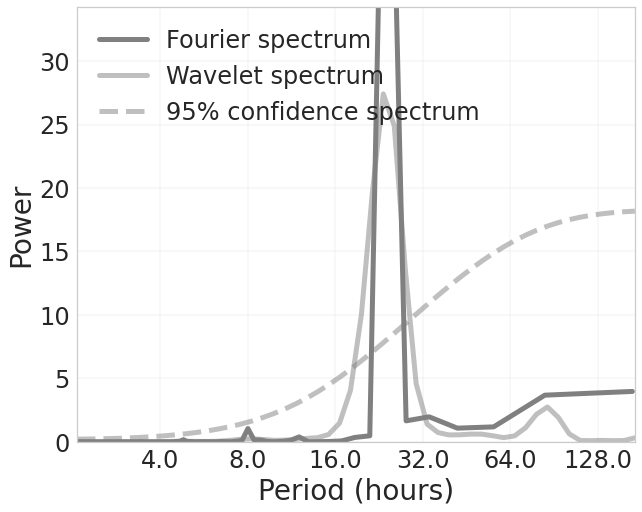

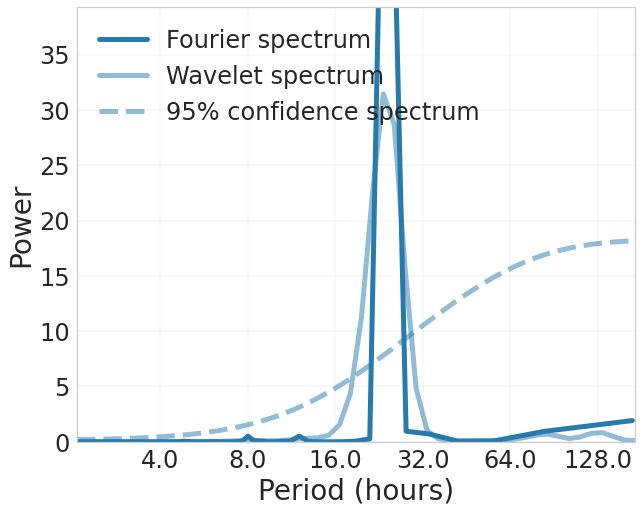

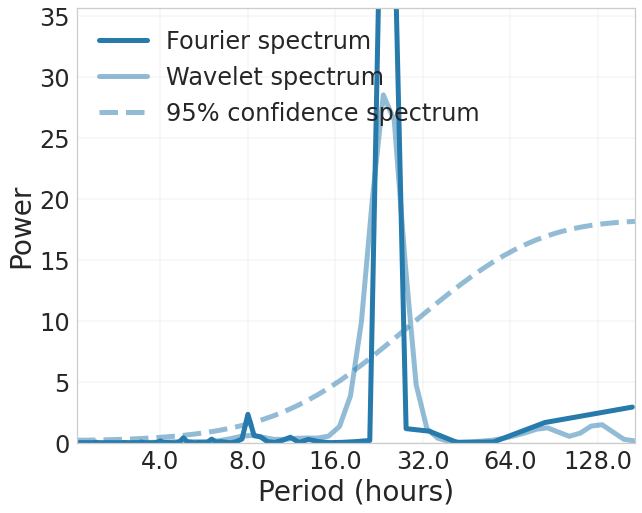

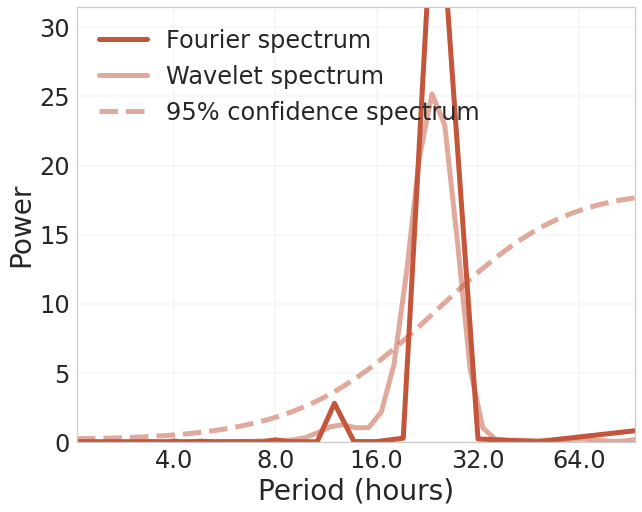

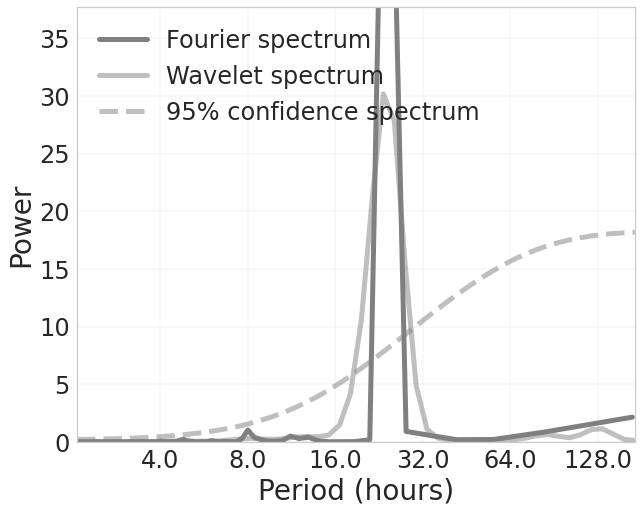

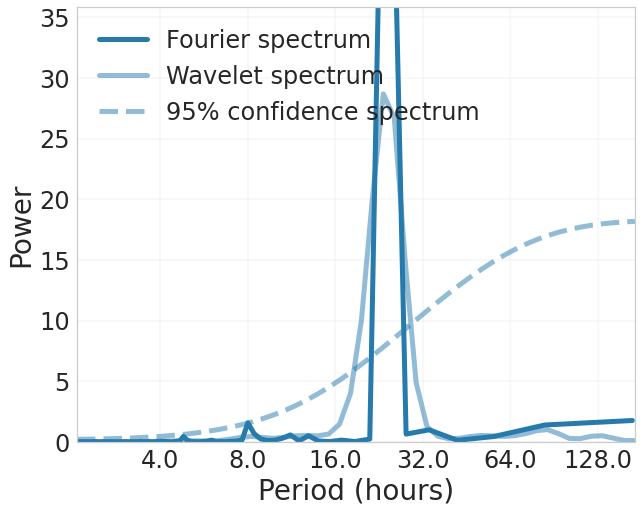

In [9]:
# 12, 13, 45, 46

x2020_b1 = normalize(sync_df[sync_df.week==12].groupby(['week','weekday','hourr'])['count'].sum().values)
x2020_d1 = normalize(sync_df[sync_df.week==13].groupby(['week','weekday','hourr'])['count'].sum().values)
x2020_a1 = normalize(sync_df[sync_df.week==14].groupby(['week','weekday','hourr'])['count'].sum().values)

x2020_b2 = normalize(sync_df[sync_df.week==44].groupby(['week','weekday','hourr'])['count'].sum().values)
x2020_d2 = normalize(sync_df[sync_df.week==45].groupby(['week','weekday','hourr'])['count'].sum().values)
x2020_a2 = normalize(sync_df[sync_df.week==46].groupby(['week','weekday','hourr'])['count'].sum().values)

x2021_b3 = normalize(sync_df[sync_df.week==53].groupby(['week','weekday','hourr'])['count'].sum().values)
x2021_d3 = normalize(sync_df_2021[sync_df_2021.week==1].groupby(['week','weekday','hourr'])['count'].sum().values)
x2021_a3 = normalize(sync_df_2021[sync_df_2021.week==2].groupby(['week','weekday','hourr'])['count'].sum().values)

result_2020_b1 = cwt(normalize(x2020_b1), 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
result_2020_d1 = cwt(normalize(x2020_d1), 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
result_2020_a1 = cwt(normalize(x2020_a1), 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
result_2020_b2 = cwt(normalize(x2020_b2), 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
result_2020_d2 = cwt(normalize(x2020_d2), 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
result_2020_a2 = cwt(normalize(x2020_a2), 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
result_2021_b3 = cwt(normalize(x2021_b3), 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
result_2021_d3 = cwt(normalize(x2021_d3), 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
result_2021_a3 = cwt(normalize(x2021_a3), 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')

wavelet_plot('2020 - Out-of-home trips - Before L1', np.arange(len(x2020_b1)), normalize(x2020_b1), 0.03125, result_2020_b1, '#c3553a')
wavelet_plot('2020 - Out-of-home trips - During L1', np.arange(len(x2020_d1)), normalize(x2020_d1), 0.03125, result_2020_d1, 'grey')
wavelet_plot('2020 - Out-of-home trips - After L1', np.arange(len(x2020_a1)), normalize(x2020_a1), 0.03125, result_2020_a1, '#267aac')
wavelet_plot('2020 - Out-of-home trips - Before L2', np.arange(len(x2020_b2)), normalize(x2020_b2), 0.03125, result_2020_b2, '#c3553a')
wavelet_plot('2020 - Out-of-home trips - During L2', np.arange(len(x2020_d2)), normalize(x2020_d2), 0.03125, result_2020_d2, 'grey')
wavelet_plot('2020 - Out-of-home trips - After L2', np.arange(len(x2020_a2)), normalize(x2020_a2), 0.03125, result_2020_a2, '#267aac')
wavelet_plot('2021 - Out-of-home trips - Before L3', np.arange(len(x2021_b3)), normalize(x2021_b3), 0.03125, result_2021_b3, '#c3553a')
wavelet_plot('2021 - Out-of-home trips - During L3', np.arange(len(x2021_d3)), normalize(x2021_d3), 0.03125, result_2021_d3, 'grey')
wavelet_plot('2021 - Out-of-home trips - After L3', np.arange(len(x2021_a3)), normalize(x2021_a3), 0.03125, result_2021_a3, '#267aac')

<p class='alert alert-success' style='font-size:20px;text-align:center;'>
    Radius of Gyration
</p>

In [10]:
radius_df = load_radius_data('radius/2020/*')
radius_df['year'] = [2020] * len(radius_df)
radius_2019_df = load_radius_data('radius/2019/*')
radius_2019_df['year'] = [2019] * len(radius_2019_df)
radius_2021_df = load_radius_data('radius/2021/*')
radius_2021_df['year'] = [2021] * len(radius_2021_df)
radius_concat = pd.concat([radius_2019_df, radius_df, radius_2021_df])

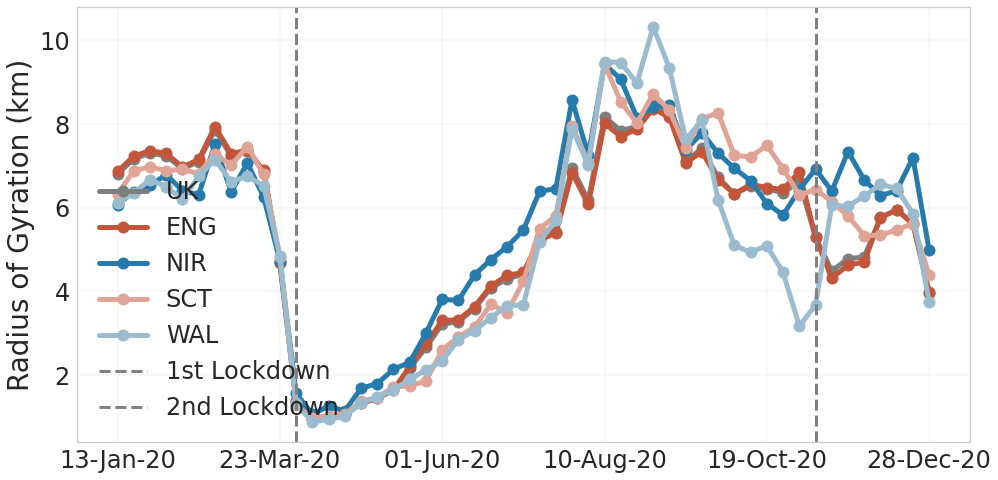

In [11]:
history_radius_df = get_metric(radius_df)
history_radius_df = history_radius_df.drop('04-Jan-21', inplace=False, axis=1)
history_radius_df.to_csv('history_radius_df.csv')

ax = history_radius_df.T.plot(figsize=(16, 8), linewidth=5, marker='o', ms=12, 
                              color=['#7e7e7e', '#c3553a', '#267aac', '#dfa496', '#9bbbcf'])
plt.axvline(x=11,linestyle='dashed',lw=3,color='grey',label='1st Lockdown')
plt.axvline(x=43,linestyle='dashed',lw=3,color='grey',label='2nd Lockdown')
# plt.title('Evolution of Mobility Activity in the UK 2020', fontsize=28)
plt.ylabel('Radius of Gyration (km)', fontsize=28)
ax.xaxis.set_tick_params(labelsize=24)
ax.yaxis.set_tick_params(labelsize=24)
plt.legend(fontsize=24, loc='lower left')
plt.grid(linewidth=.25)
plt.show()

In [12]:
history_radius_2019_df = get_metric(radius_2019_df, period=[1, 52])
history_radius_2019_df.to_csv('history_radius_2019_df.csv')

ax = history_radius_2019_df.T.plot(figsize=(16, 8), linewidth=5, marker='o', ms=12, 
                                   color=['#7e7e7e', '#c3553a', '#267aac', '#dfa496', '#9bbbcf'])
# plt.title('Evolution of Mobility Activity in the UK 2019', fontsize=28)
plt.ylabel('Radius of Gyration (km)', fontsize=28)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)
plt.legend(fontsize=18, loc='upper left')
plt.grid(linewidth=.25)
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


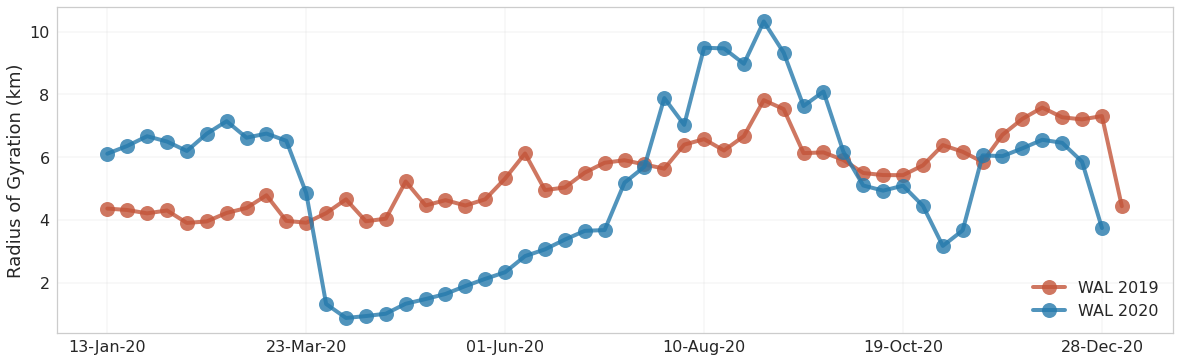

In [13]:
for loc in ['UK', 'ENG', 'WAL', 'NIR', 'SCT']:
    f, ax = plt.subplots(figsize=(20,6))
    plt.plot(history_radius_2019_df.T[loc].values, c='#c3553a', linewidth=4, label='{} 2019'.format(loc), marker='o', ms=15, alpha=0.8)
    plt.plot(history_radius_df.T[loc].values, c='#267aac', linewidth=4, label='{} 2020'.format(loc), marker='o', ms=15, alpha=0.8)
#     plt.plot(history_radius_2021_df.T[loc].values, c='grey', linewidth=4, label='{} 2021'.format(loc), marker='o', ms=15)

    
#     plt.title("Comparison Radius 2019 vs 2020", fontsize=28)
    plt.ylabel('Radius of Gyration (km)', fontsize=18)
    locs, labels = plt.xticks()
    ax.set_xticklabels([history_radius_df.columns[int(idx)] for idx in locs if idx < 54])
    ax.xaxis.set_tick_params(labelsize=16)
    ax.yaxis.set_tick_params(labelsize=16)
    plt.legend(fontsize=16, loc='lower right')
    plt.grid(linewidth=.25)
    plt.show()

Week: 13 2020


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


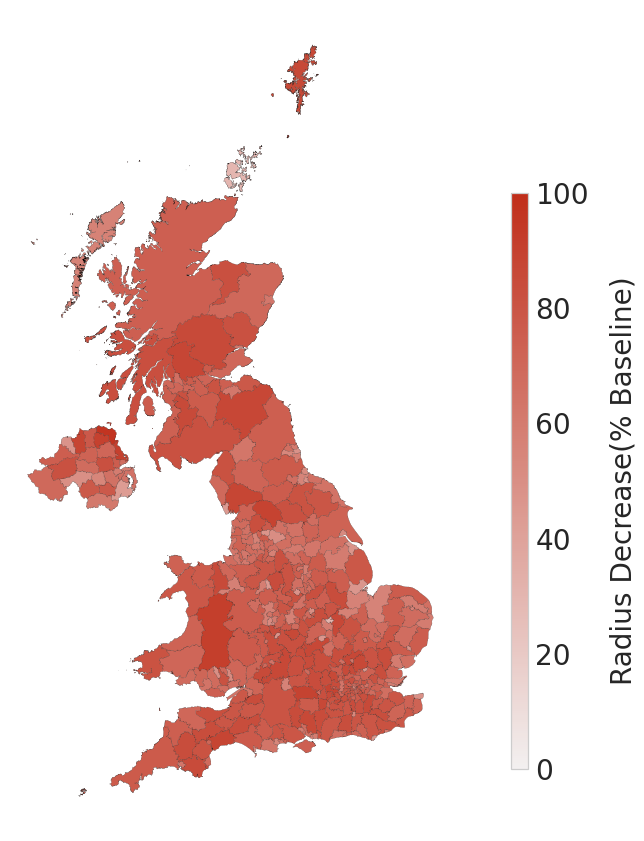

increase, 0.0
decrease, 100.0
Week: 45 2020


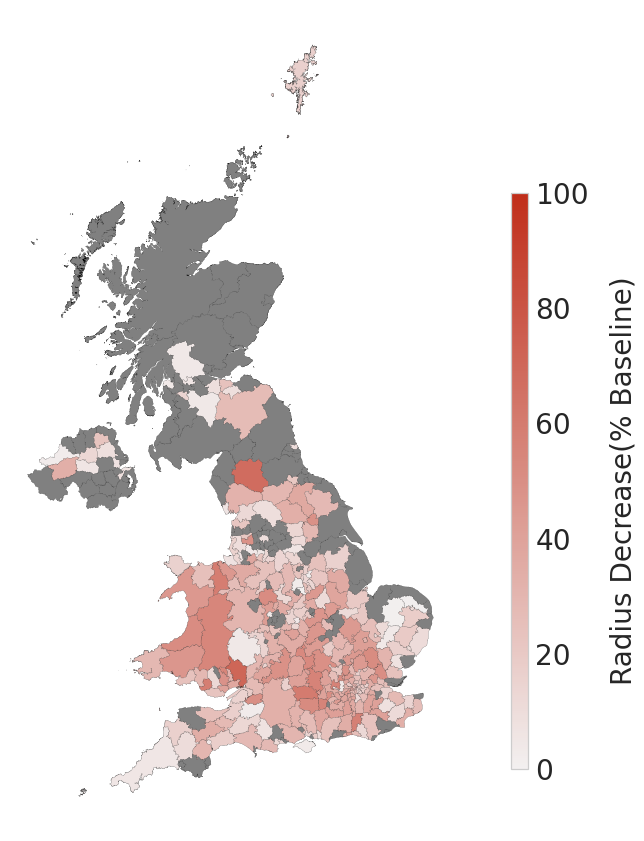

increase, 29.702970297029704
decrease, 70.29702970297029
Week: 1 2021


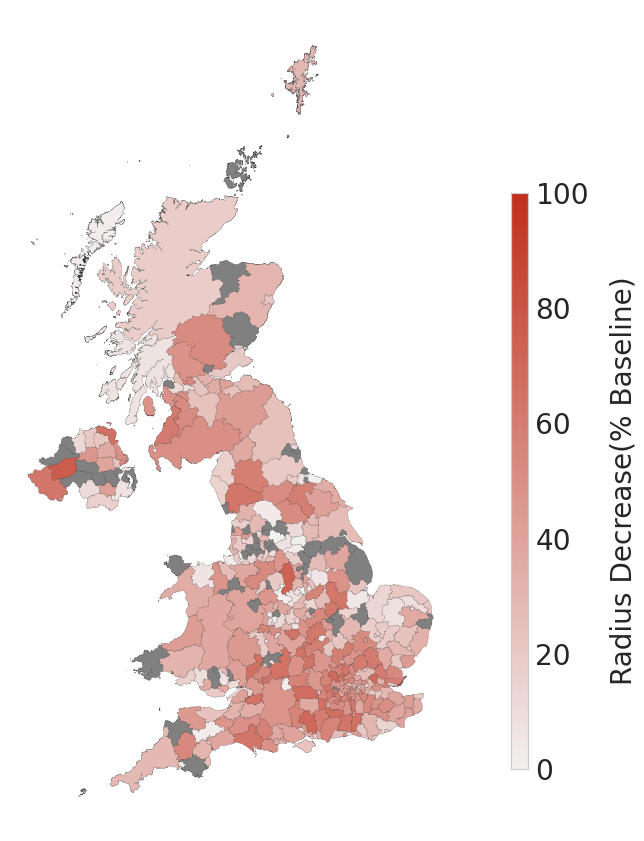

increase, 14.356435643564357
decrease, 85.64356435643565


In [14]:
for w in [13, 45]:
    print('Week: {} 2020'.format(w))
    temp1 =  radius_2019_df[radius_2019_df.week == w][['geo_code', 'radius']].groupby('geo_code').median().reset_index() 
    temp2 = radius_df[radius_df.week == w][['geo_code', 'radius']].groupby('geo_code').median().reset_index()
    df = temp1.merge(temp2, on=['geo_code'], suffixes=['_baseline', '_new'])
    df["radious_diff"] = (df["radius_baseline"] - df["radius_new"])/ df["radius_baseline"]
    df["radious_perc"] = df["radious_diff"].apply(aux_func)
#     plot_mobility_activity(df, c='#C02E1A', name='figures/mob_activity_w{}.eps'.format(w), 
#                            leg='Radius Decrease(% Baseline)')
    plot_mobility_activity(df, c='#C02E1A', name='figures/mob_activity_w{}.eps'.format(w), 
                           leg='Radius Decrease(% Baseline)', min_max=[0, 100])
    print('increase,', 100*len(df[df.radious_perc>=0])/len(df))
    print('decrease,', 100*len(df[df.radious_perc<0])/len(df))
    
    
print('Week: {} 2021'.format(1))
temp1 =  radius_2019_df[radius_2019_df.week == 1][['geo_code', 'radius']].groupby('geo_code').median().reset_index() 
temp2 = radius_2021_df[radius_2021_df.week == 1][['geo_code', 'radius']].groupby('geo_code').median().reset_index()
df = temp1.merge(temp2, on=['geo_code'], suffixes=['_baseline', '_new'])
df["radious_diff"] = (df["radius_baseline"] - df["radius_new"])/ df["radius_baseline"]
df["radious_perc"] = df["radious_diff"].apply(aux_func)
# plot_mobility_activity(df, c='#C02E1A', name='figures/mob_activity_w{}.eps'.format(1), 
#                        leg='Radius Decrease(% Baseline)')
plot_mobility_activity(df, c='#C02E1A', name='figures/mob_activity_w{}.png'.format(1), 
                       leg='Radius Decrease(% Baseline)', min_max=[0, 100])
print('increase,', 100*len(df[df.radious_perc>=0])/len(df))
print('decrease,', 100*len(df[df.radious_perc<0])/len(df))

<p class='alert alert-success' style='font-size:20px;text-align:center;'>
    Mobility Synchronicity
</p>

In [15]:
history_sync_df = get_sync_uk_countries(sync_df)
history_sync_df_2019 = get_sync_uk_countries(sync_df_2019[sync_df_2019.year==2019])

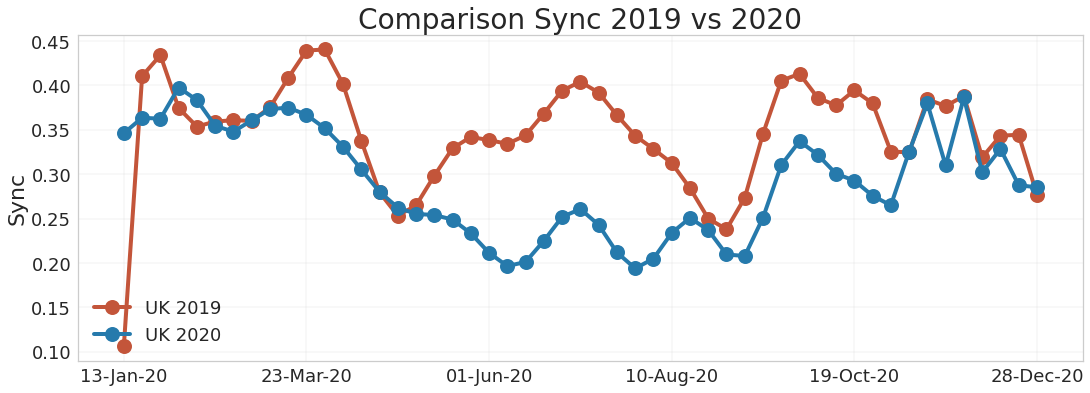

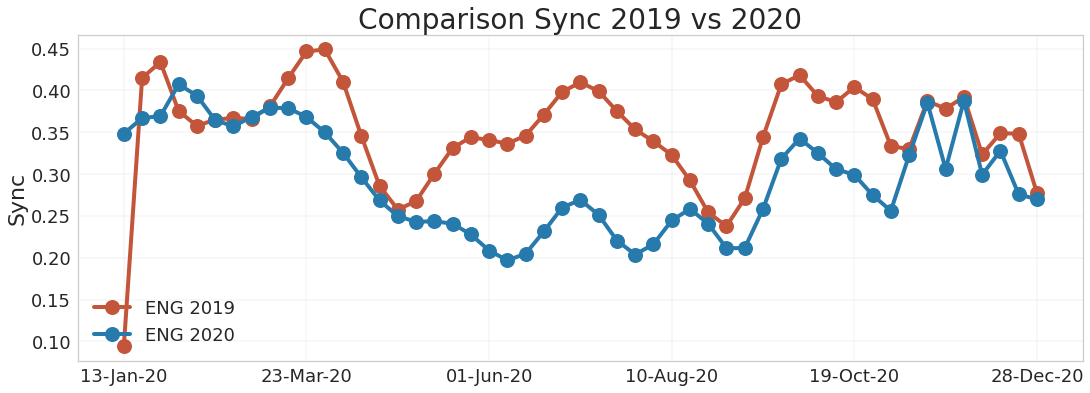

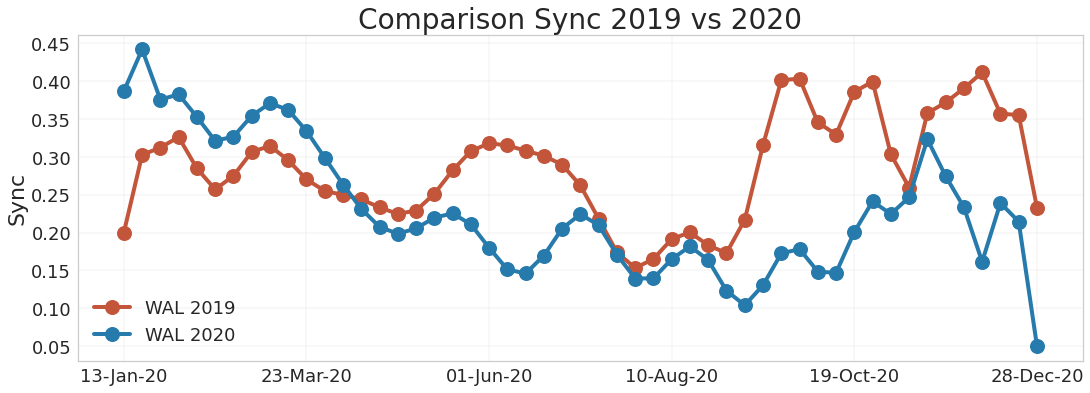

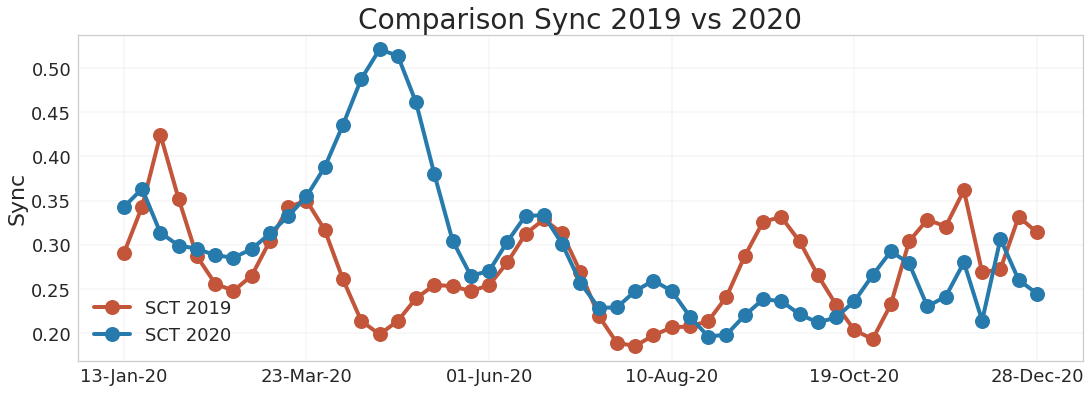

In [16]:
for loc in ['UK', 'ENG', 'WAL', 'NIR', 'SCT']:
    f, ax = plt.subplots(figsize=(18,6))

#     plt.plot(history_sync_df_2019.T[loc].values, c='#c3553a', linewidth=4, label='{} 2019'.format(loc), marker='o', ms=15)
#     plt.plot(history_sync_df.T[loc].values, c='#267aac', linewidth=4, label='{} 2020'.format(loc), marker='o', ms=15)
    
    plt.plot(get_polyfit(history_sync_df_2019.T[loc].values), c='#c3553a', linewidth=4, label='{} 2019'.format(loc), marker='o', ms=15)
    plt.plot(get_polyfit(history_sync_df.T[loc].values), c='#267aac', linewidth=4, label='{} 2020'.format(loc), marker='o', ms=15)


    plt.title("Comparison Sync 2019 vs 2020", fontsize=28)
    plt.ylabel('Sync', fontsize=22)
    locs, labels = plt.xticks()
    ax.set_xticklabels([history_out_home_df.columns[int(idx)] for idx in locs if idx < 52])
    ax.xaxis.set_tick_params(labelsize=18)
    ax.yaxis.set_tick_params(labelsize=18)
#     plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.legend(fontsize=18, loc='lower left')
    plt.grid(linewidth=.25)
    plt.show()

In [17]:
sync_geo_codes_2020 = get_sync_geo_codes(sync_df, year=2020, xaxis=range(2, 53), soc=False)
sync_geo_codes_2019 = get_sync_geo_codes(sync_df_2019, year=2019, xaxis=range(1, 53), soc=False)
sync_geo_codes_2021 = get_sync_geo_codes(sync_df_2021, year=2021, xaxis=range(1, 5), soc=False)
sync_geo_codes_2021.head()

geo_code  week  period      sync  count
0     95CC     1  04/Jan  0.201539   6885
1     95CC     2  11/Jan  0.092804   8167
2     95CC     3  18/Jan  0.057614   6697
3     95CC     4  25/Jan  0.070269   6658
4     95GG     1  04/Jan  0.077520  68465

Week:13


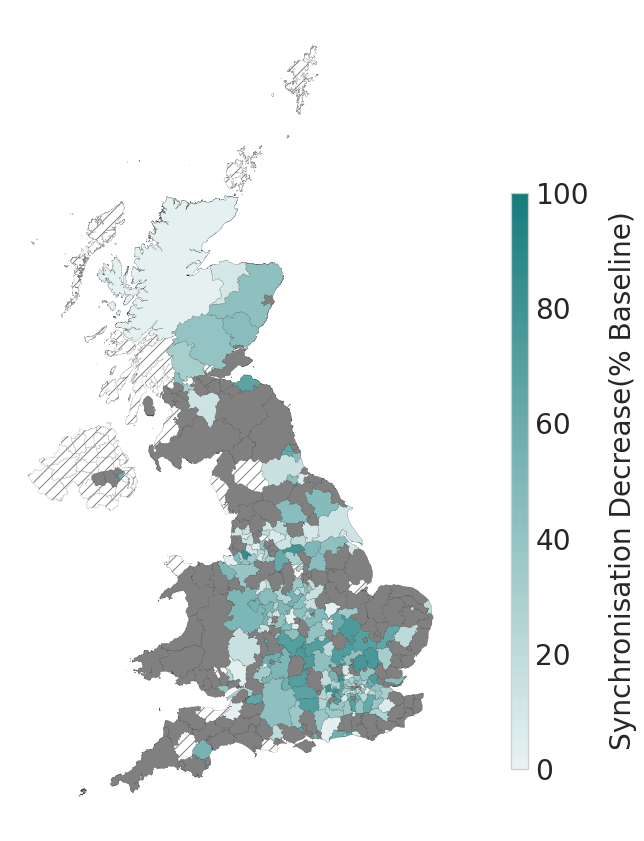

increase, 43.333333333333336
decrease, 56.666666666666664
Week:45


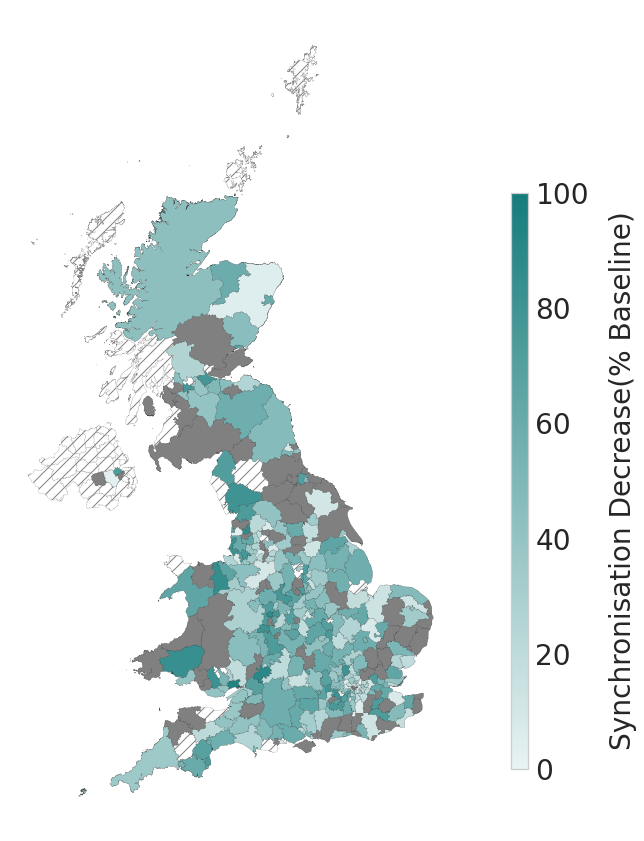

increase, 21.666666666666668
decrease, 78.33333333333333
Week:1, Min:-94.29702560489837, Max:868.7606306205124


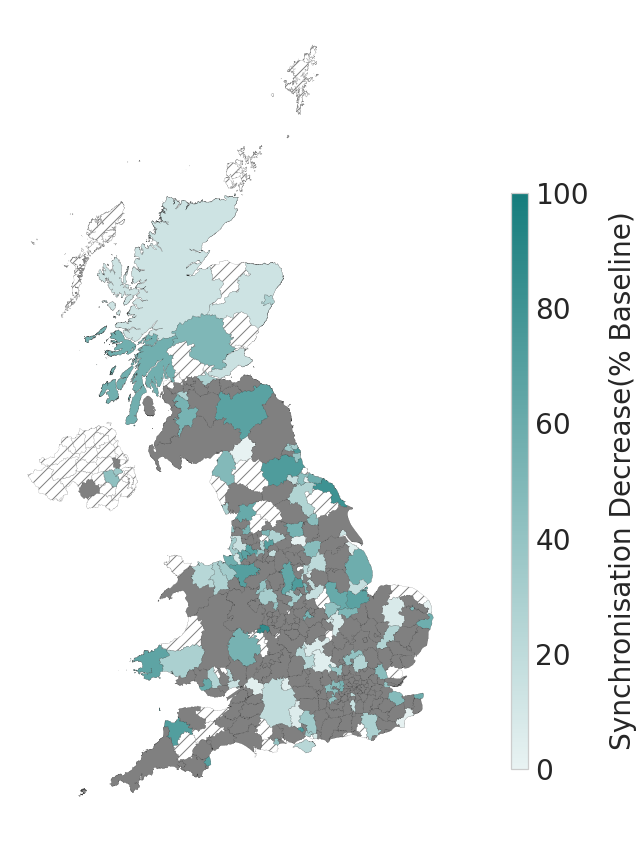

increase, 65.98240469208211
decrease, 34.01759530791789


In [18]:
for w in [13, 45]:
    print("Week:{}".format(w))

    temp1 = sync_geo_codes_2019[sync_geo_codes_2019.week == w][['geo_code', 'sync']]
    temp2 = sync_geo_codes_2020[sync_geo_codes_2020.week == w][['geo_code', 'sync']]
    df_sync = temp1.merge(temp2, on=['geo_code'], suffixes=['_baseline', '_new'])

    df_sync["sync_diff"] = (df_sync["sync_baseline"] - df_sync["sync_new"])/ df_sync["sync_baseline"]
    df_sync["sync_perc"] = df_sync["sync_diff"].apply(aux_func)
    plot_mobility_activity(df_sync, c='#167C7C', name='figures/sync_activity_w{}.eps'.format(w), col="sync_perc",
                           leg='Synchronisation Decrease(% Baseline)', min_max=[0, 100])

    print('increase,', 100*len(df_sync[df_sync.sync_perc>=0])/len(df_sync))
    print('decrease,', 100*len(df_sync[df_sync.sync_perc<0])/len(df_sync))

    
print("Week:{}, Min:{}, Max:{}".format(1, min(df_sync.sync_perc.unique()), max(df_sync.sync_perc.unique())))
temp1 = sync_geo_codes_2019[sync_geo_codes_2019.week == 1][['geo_code', 'sync']]
temp2 = sync_geo_codes_2021[sync_geo_codes_2021.week == 1][['geo_code', 'sync']]
df_sync = temp1.merge(temp2, on=['geo_code'], suffixes=['_baseline', '_new'])

df_sync["sync_diff"] = (df_sync["sync_baseline"] - df_sync["sync_new"])/ df_sync["sync_baseline"]
df_sync["sync_perc"] = df_sync["sync_diff"].apply(aux_func)

plot_mobility_activity(df_sync, c='#167C7C', name='figures/sync_activity_w{}.eps'.format(1), col="sync_perc",
                       leg='Synchronisation Decrease(% Baseline)', min_max=[0, 100])
print('increase,', 100*len(df_sync[df_sync.sync_perc>=0])/len(df_sync))
print('decrease,', 100*len(df_sync[df_sync.sync_perc<0])/len(df_sync))
plt.show()

<p class='alert alert-success' style='font-size:20px;text-align:center;'>
    Radius vs Synchronicity
</p>

In [19]:
history_sync_df_2021 = get_sync_uk_countries(sync_df_2021[sync_df_2021.week < 8])
history_radius_2021_df = get_metric(radius_2021_df, period=[1, 7])
history_sync_concat = pd.concat([history_sync_df, history_sync_df_2021], axis=1)
history_radius_concat = pd.concat([history_radius_df, history_radius_2021_df], axis=1)
history_sync_concat.head()

13-Jan-20  20-Jan-20  27-Jan-20  03-Feb-20  10-Feb-20  17-Feb-20  \
UK    0.346812   0.357775   0.383093   0.363512   0.400773   0.381550   
ENG   0.349064   0.360748   0.391208   0.370092   0.414300   0.390907   
NIR   0.387093   0.440910   0.381827   0.369831   0.355749   0.358374   
WAL   0.387093   0.440910   0.381827   0.369831   0.355749   0.358374   
SCT   0.342756   0.364068   0.308228   0.314222   0.280000   0.282860   

     24-Feb-20  02-Mar-20  09-Mar-20  16-Mar-20  ...  07-Dec-20  14-Dec-20  \
UK    0.306288   0.370822   0.380712   0.380765  ...   0.302893   0.328366   
ENG   0.313281   0.379572   0.387476   0.385710  ...   0.300025   0.327803   
NIR   0.265293   0.372584   0.400808   0.362248  ...   0.161378   0.239140   
WAL   0.265293   0.372584   0.400808   0.362248  ...   0.161378   0.239140   
SCT   0.299638   0.306532   0.305659   0.293038  ...   0.213511   0.306821   

     21-Dec-20  28-Dec-20  04-Jan-21  11-Jan-21  18-Jan-21  25-Jan-21  \
UK    0.287771   0.285343   0.291328   0.257078   0.288028   0.272518   
ENG   0.275745   0.269868   0.268541   0.245322   0.283585   0.263999   
NIR   0.214599   0.050255   0.130300   0.217787   0.201262   0.202837   
WAL   0.214599   0.050255   0.130300   0.217787   0.201262   0.202837   
SCT   0.260193   0.244778   0.434409   0.316071   0.213927   0.248174   

     01-Feb-21  08-Feb-21  
UK    0.250999   0.257862  
ENG   0.251748   0.241744  
NIR   0.267975   0.233224  
WAL   0.267975   0.233224  
SCT   0.202240   0.225127  

[5 rows x 57 columns]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


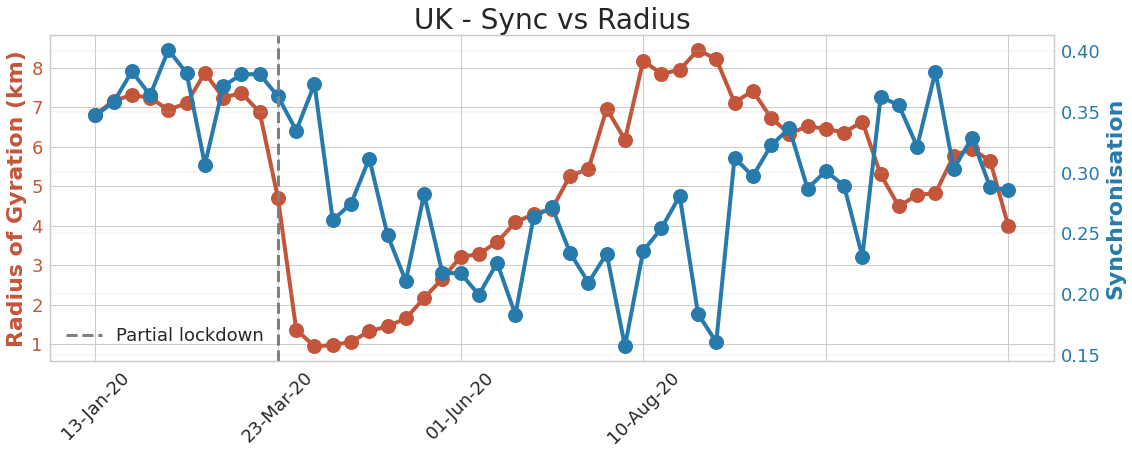

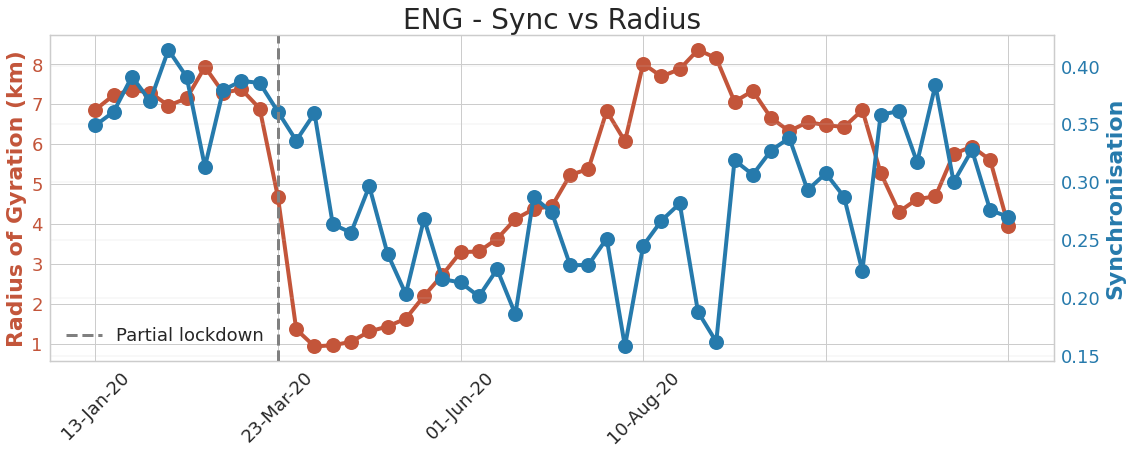

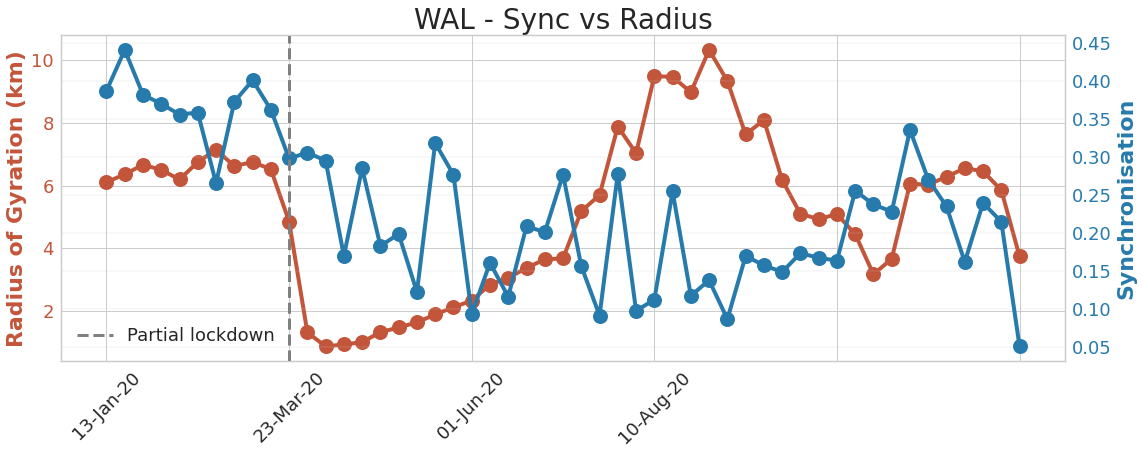

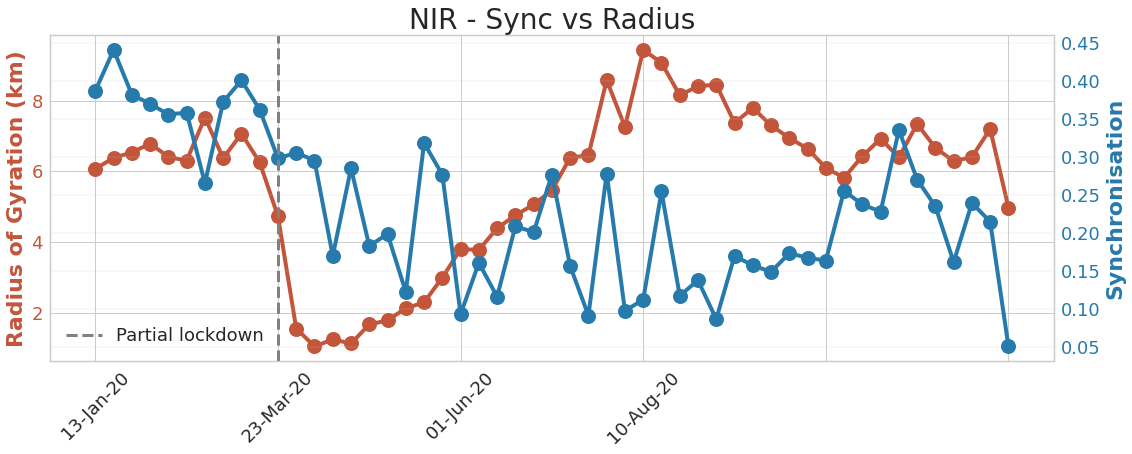

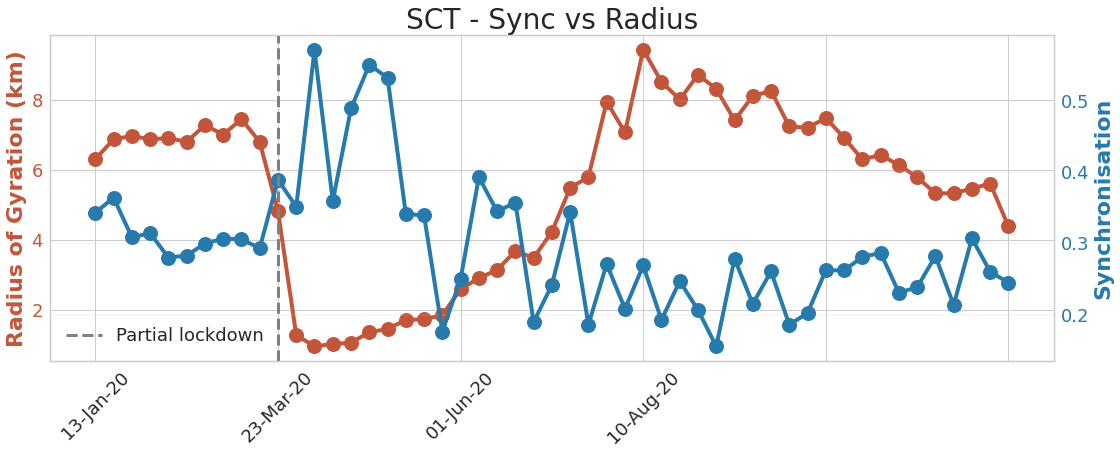

In [20]:
for loc in ['UK', 'ENG', 'WAL', 'NIR', 'SCT']:
    f, ax = plt.subplots(figsize=(18,6))
    ax.plot(history_radius_df.T[loc].values, c='#c3553a', linewidth=4, label='Radius', marker='o', ms=15)
    
    plt.title('{} - Sync vs Radius'.format(loc), fontsize=28)
    ax.set_ylabel('Radius of Gyration (km)', fontsize=22, color='#c3553a', weight='bold')
    locs, labels = plt.xticks()
    ax.set_xticklabels([history_out_home_df.columns[int(idx)] for idx in locs if idx < 38], rotation=45)
    ax.xaxis.set_tick_params(labelsize=18)
    ax.yaxis.set_tick_params(labelsize=18, labelcolor='#c3553a')
    
    ax1 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    ax1.plot(history_sync_df.T[loc].values, c='#267aac', linewidth=4, marker='o', ms=15)
    ax1.set_ylabel("Synchronisation", fontsize=22, color='#267aac', weight='bold')
    ax1.yaxis.set_tick_params(labelsize=18, labelcolor='#267aac')
    
    plt.axvline(x=10,linestyle='dashed',lw=3,color='grey',label='Partial lockdown')
    plt.legend(fontsize=18, loc='lower left')
    plt.grid(linewidth=.25)
    plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


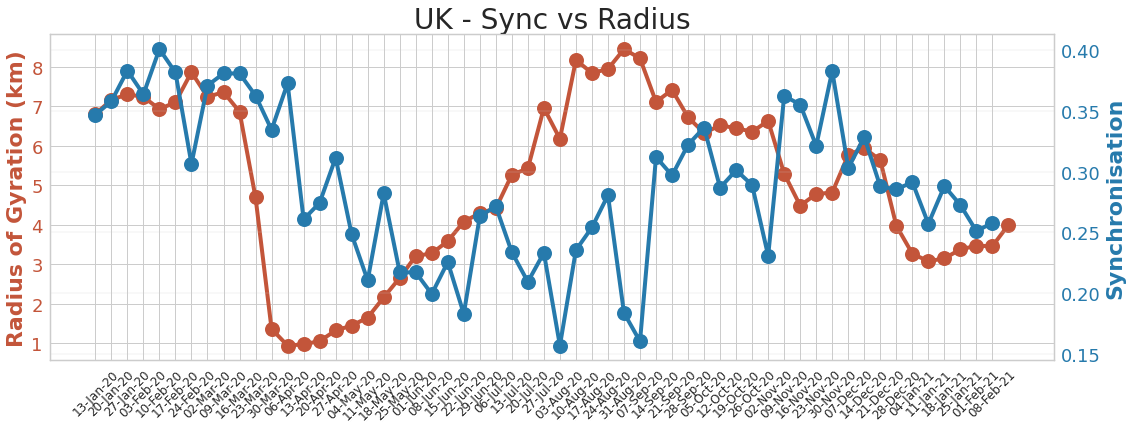

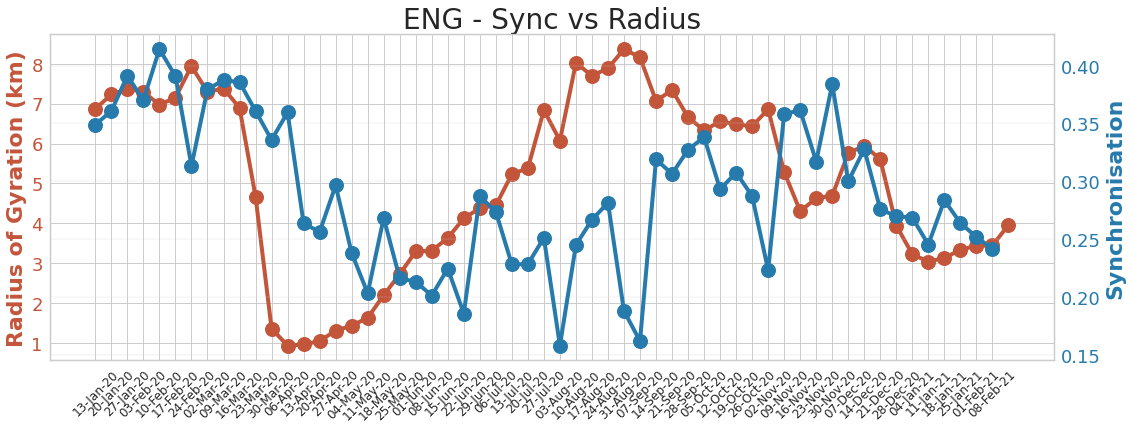

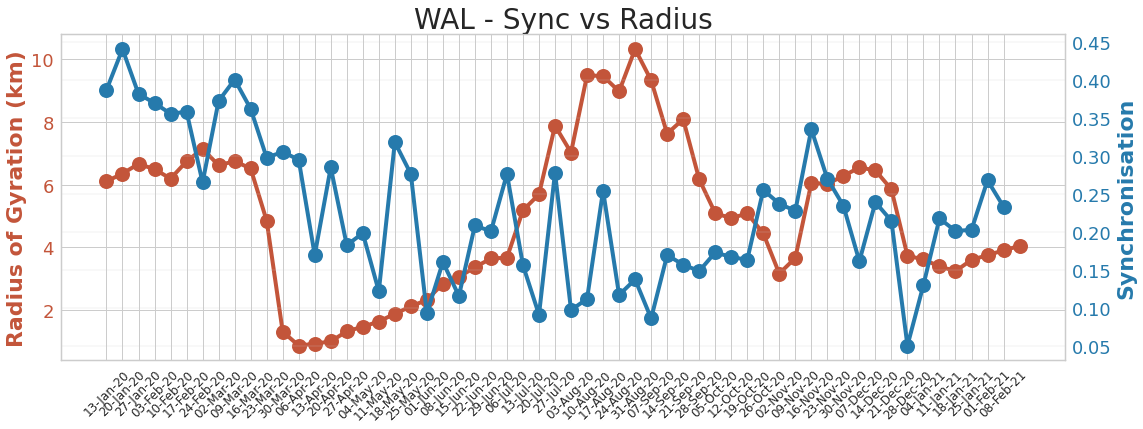

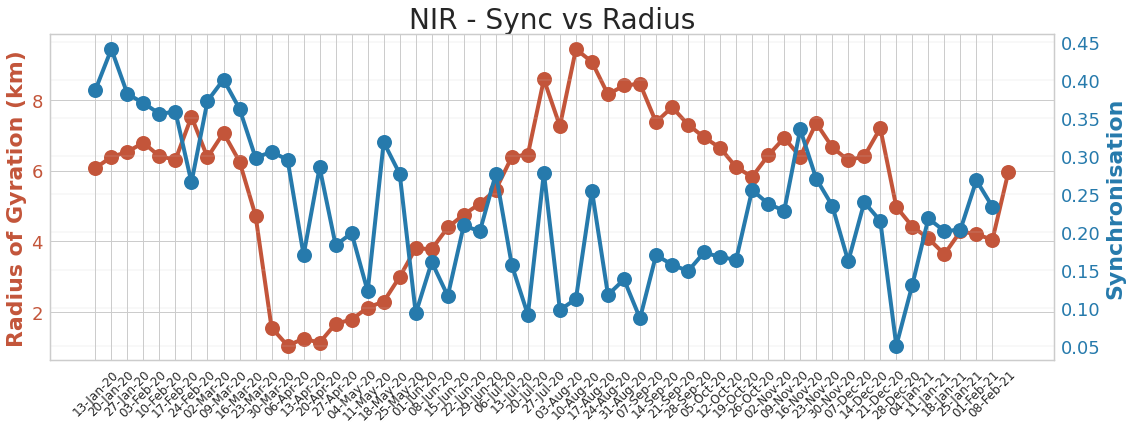

In [21]:
for loc in ['UK', 'ENG', 'WAL', 'NIR', 'SCT']:
    f, ax = plt.subplots(figsize=(18,6))
    ax.plot(history_radius_concat.T[loc].index, history_radius_concat.T[loc].values, c='#c3553a', linewidth=4, label='Radius', marker='o', ms=15)
    
    plt.title('{} - Sync vs Radius'.format(loc), fontsize=28)
    ax.set_ylabel('Radius of Gyration (km)', fontsize=22, color='#c3553a', weight='bold')
    locs, labels = plt.xticks()
    ax.set_xticklabels([history_sync_concat.T[loc].index[int(idx)] for idx in locs if idx < 57], rotation=45)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=18, labelcolor='#c3553a')
    
    ax1 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    ax1.plot(history_sync_concat.T[loc].index, history_sync_concat.T[loc].values, c='#267aac', linewidth=4, marker='o', ms=15)
    ax1.set_ylabel("Synchronisation", fontsize=22, color='#267aac', weight='bold')
    ax1.yaxis.set_tick_params(labelsize=18, labelcolor='#267aac')
    
#     plt.axvline(x=10,linestyle='dashed',lw=3,color='grey',label='Partial lockdown')
#     plt.legend(fontsize=18, loc='lower left')
    plt.grid(linewidth=.25)
    plt.show()

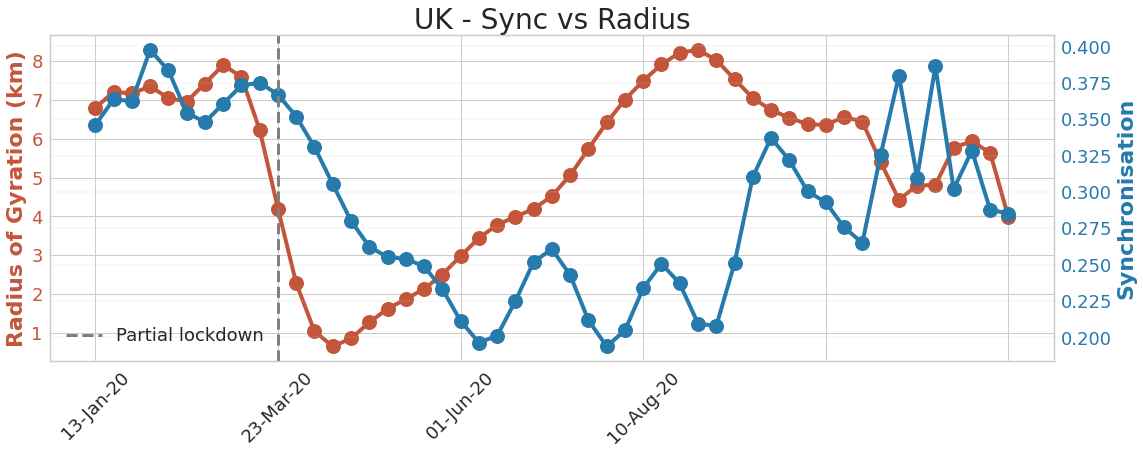

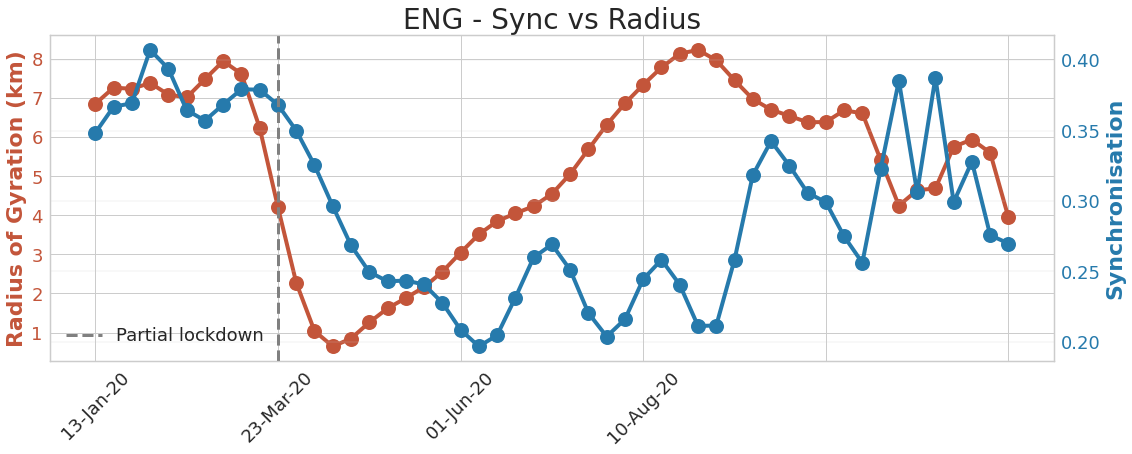

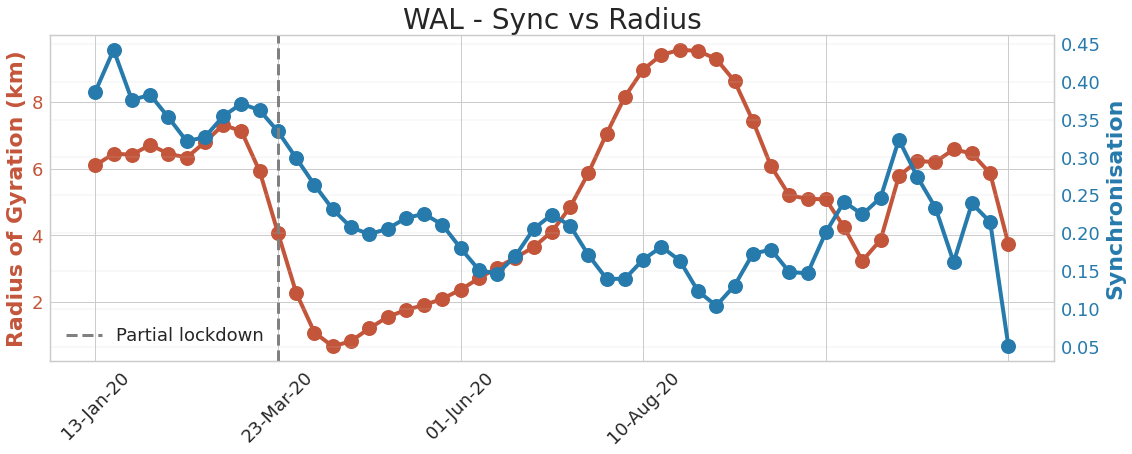

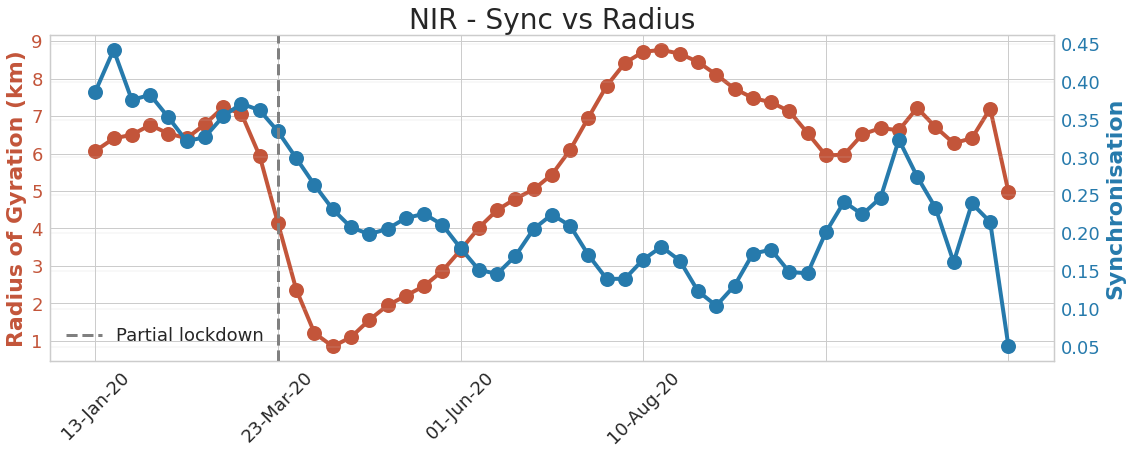

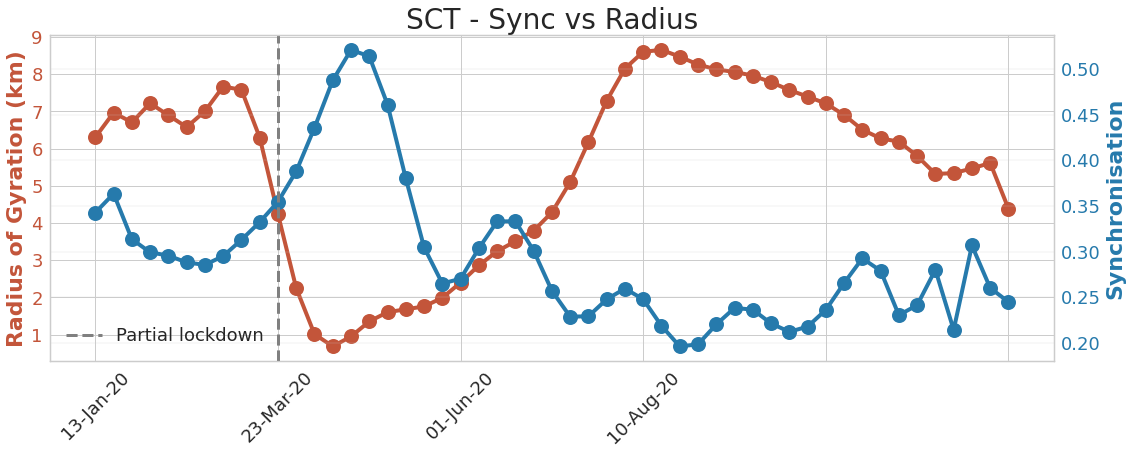

In [22]:
for loc in ['UK', 'ENG', 'WAL', 'NIR', 'SCT']:
    f, ax = plt.subplots(figsize=(18,6))
    ax.plot(get_polyfit(history_radius_df.T[loc].values) , c='#c3553a', linewidth=4, label='Radius', marker='o', ms=15)
    
    plt.title('{} - Sync vs Radius'.format(loc), fontsize=28)
    ax.set_ylabel('Radius of Gyration (km)', fontsize=22, color='#c3553a', weight='bold')
    locs, labels = plt.xticks()
    ax.set_xticklabels([history_out_home_df.columns[int(idx)] for idx in locs if idx < 38], rotation=45)
    ax.xaxis.set_tick_params(labelsize=18)
    ax.yaxis.set_tick_params(labelsize=18, labelcolor='#c3553a')
    
    ax1 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    ax1.plot(get_polyfit(history_sync_df.T[loc].values), c='#267aac', linewidth=4, marker='o', ms=15)
    ax1.set_ylabel("Synchronisation", fontsize=22, color='#267aac', weight='bold')
    ax1.yaxis.set_tick_params(labelsize=18, labelcolor='#267aac')
    
    plt.axvline(x=10,linestyle='dashed',lw=3,color='grey',label='Partial lockdown')
    plt.legend(fontsize=18, loc='lower left')
    plt.grid(linewidth=.25)
    plt.show()

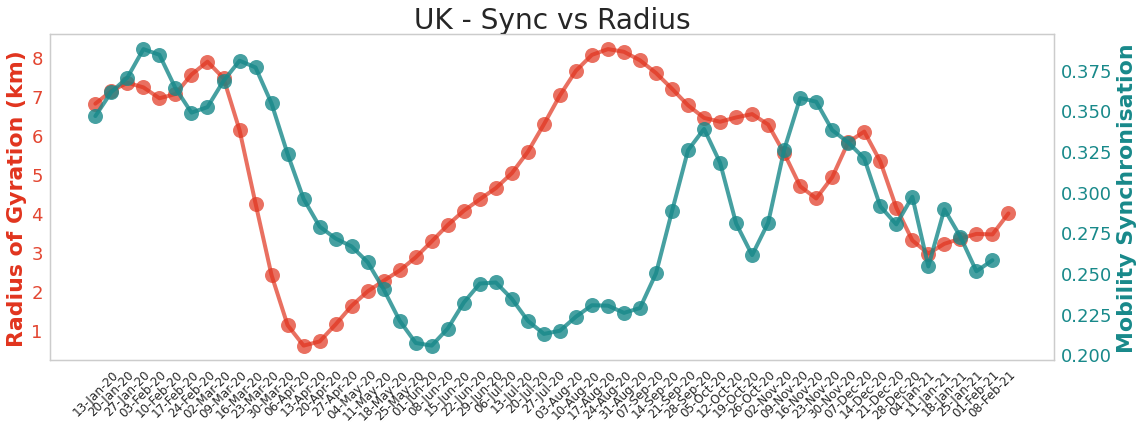

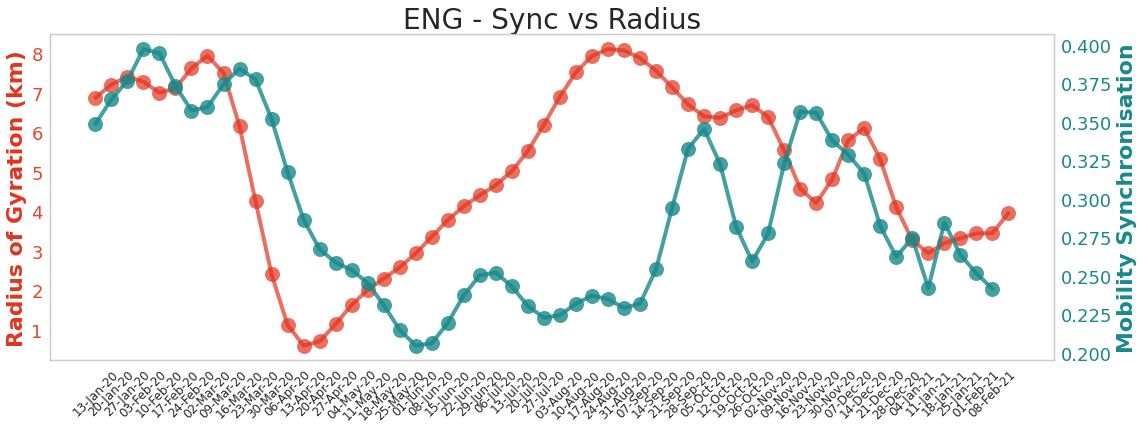

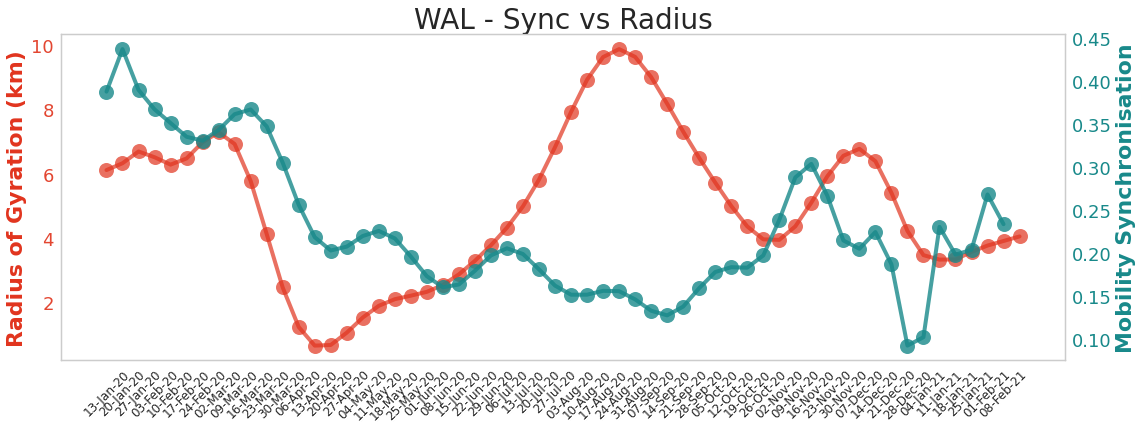

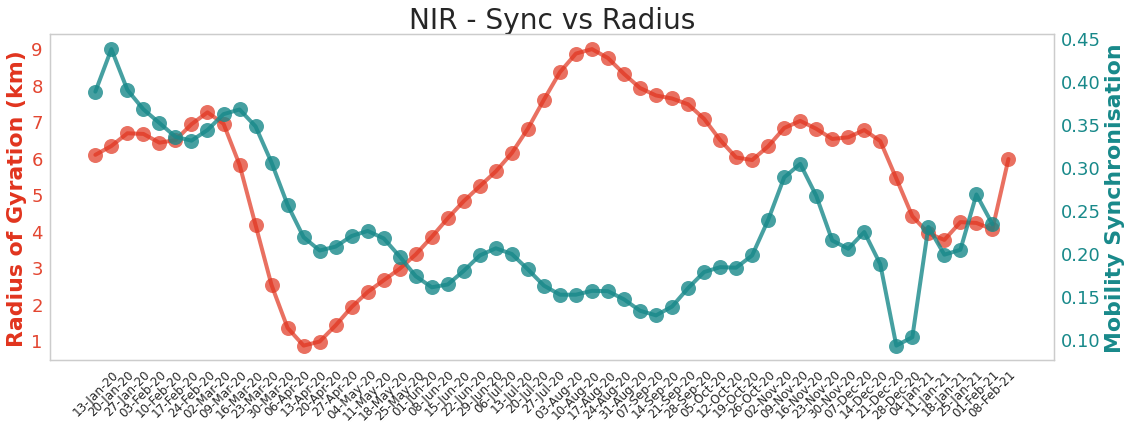

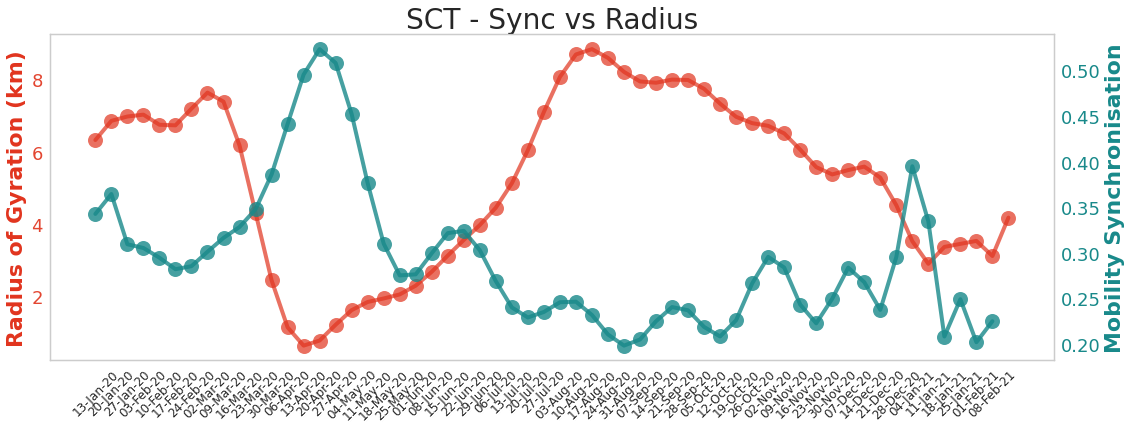

In [23]:
for loc in ['UK', 'ENG', 'WAL', 'NIR', 'SCT']: #E34631  18898A
    f, ax = plt.subplots(figsize=(18,6))
    ax.plot(history_radius_concat.T[loc].index, get_polyfit(history_radius_concat.T[loc].values) , c='#E1341E', linewidth=4, label='Radius', marker='o', ms=15, alpha=0.7)
    
    plt.title('{} - Sync vs Radius'.format(loc), fontsize=28)
    ax.set_ylabel('Radius of Gyration (km)', fontsize=22, color='#E1341E', weight='bold')
    locs, labels = plt.xticks()
    ax.set_xticklabels([history_sync_concat.T[loc].index[int(idx)] for idx in locs if idx < 57], rotation=45)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=18, labelcolor='#E34631')
    
    ax1 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    ax1.plot(history_sync_concat.T[loc].index, get_polyfit(history_sync_concat.T[loc].values), c='#18898A', linewidth=4, marker='o', ms=15, alpha=0.8)
    ax1.set_ylabel("Mobility Synchronisation", fontsize=22, color='#18898A', weight='bold')
    ax1.yaxis.set_tick_params(labelsize=18, labelcolor='#18898A')
    
    ax1.grid(False)
    ax.grid(False)
    plt.show()